## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
#!pip install -U pip
#!pip install -U imblearn
#!pip install importlib_metadata
#!pip install -U scikit-learn
#!pip install Catboost
#from importlib_metadata import version
#version('scikit-learn')

In [342]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import RFE

from xgboost import XGBRFClassifier as xgb
import lightgbm as lgbm
import statsmodels.api as sm
from imblearn import over_sampling
#from imblearn import under_sampling

from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import MaxPool1D, AvgPool1D, GlobalAvgPool1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from keras.optimizers import Adam, SGD
from keras.regularizers import l2, L1L2
import tensorflow as tf

from keras.layers.convolutional import Conv1D, MaxPooling1D

from collections import Counter
import itertools
from timeit import default_timer as timer

%matplotlib inline
pd.options.display.max_columns = 31
#plt.rcParams['axes.facecolor'] = 'white'
sns.set_style("white")

filename='creditcard.csv'
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


## <font color=red>Want to run Expensive/Time/ Resource consuming Process- CrossValidation?</font>

In [31]:
#Everytime running cross validation is taking time. 
#So if you do not want to run the code with CV and 
#want to run only with optimized Hyper Parameters then set this False

run_cv=False 

## <font color=blue> Section 1: Exploratory data analysis </font>

#### Getting data from kaggle to colab dataset.


#!pip install kaggle
from google.colab import files

#Choose the kaggle.json file that you downloaded
files.upload()

#Make directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json

#{competitions,c,datasets,d,kernels,k,config}
#List of All Kaggle Competitions - Where I am Registered
#!kaggle competitions list

#kaggle competions list which has name creditcardfraud
#!kaggle competitions list -s creditcardfraud #No competetion exists

#search creditcardfraud dataset in kaggle
!kaggle datasets list -s creditcardfraud 
#Two datasets exits
#isaikumar/creditcardfraud  mlg-ulb/creditcardfraud

#Download creditcardfraud.zip file. file get downloaded in /content folder
!kaggle datasets download -d 'isaikumar/creditcardfraud'

#unzip creditcardfraud file
#Create a directory named train,
#!mkdir train
#!unzip creditcardfraud.zip -d train
!unzip creditcardfraud.zip

#Check whether creditcardfraud.csv exists in working folder on colab
!ls

#if creditcardfraud file is non kaggle file and load avaialbe on internet then it can be downloaded as below
#!wget "https://www.kaggle.com/mlg-ulb/creditcardfraud"

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
filename='/content/creditcard.csv'

In [32]:
df = pd.read_csv(filename)
print (df.shape)

(284807, 31)


In [15]:
#observe the different feature type present in the data
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [16]:
df.info()
#No Null Value. All the float fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [17]:
df.describe().T
#Range of all the fields not same. If we take data as given for modeling some variables will 
#have more influence on the model than other so scaling need to done

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [18]:
#Can we take time as primary key field?

temp=df.groupby('Time')['Class'].count()
temp.reset_index()
print(temp[temp>1].sort_values(ascending=False))
del temp

#Time Field cannot be treated as unique identifier because it has many duplicate entries.
#Can it be useful in prediction fraud?

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
104444.0     2
104438.0     2
104238.0     2
104139.0     2
0.0          2
Name: Class, Length: 79429, dtype: int64


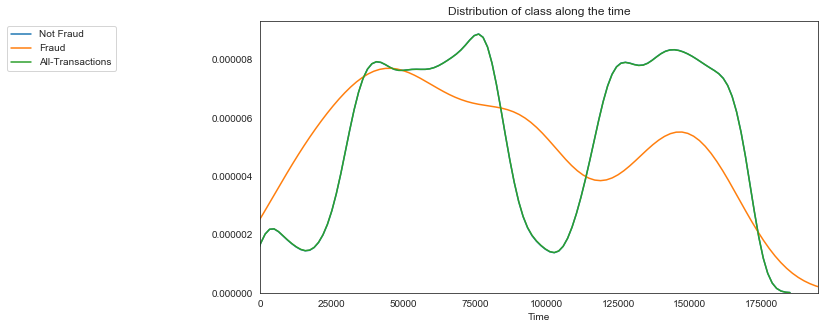

Duration  0.5040393999999537


In [19]:
#Distribution of class along the time
#fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(20,4))
start=timer()

plt.figure(figsize=(10,5))

class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

ax=sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
ax=sns.distplot(class_1,hist=False,rug=False,label='Fraud')

sns.distplot(df.Time,hist=False,rug=False,label='All-Transactions')
plt.title ("Distribution of class along the time")

ax.legend(bbox_to_anchor=(-.25, 1))

plt.show()

end = timer()
print("Duration ",end - start)

#Distribution of data for fraud and non-faud transactions are different. So it looks it can be useful in predction.
#But time field need to be scaled

In [20]:
#Analysis of Amount Field

max_amount=int(round(max(df.Amount) *1.04,-3))
bins=list(range(0,1601,100))
bins.append(max_amount)
df['Amt']=pd.cut(df.Amount,bins)

df.pivot_table(index="Amt",columns="Class",values="V1",aggfunc=len)
#Almost no fraud transaction of value more than $1600
#Most of the fraud are of <=$100

Class,0,1
Amt,,
"(0, 100]",226139.0,335.0
"(100, 200]",27626.0,45.0
"(200, 300]",10754.0,22.0
"(300, 400]",5516.0,21.0
"(400, 500]",3375.0,7.0
"(500, 600]",2148.0,7.0
"(600, 700]",1430.0,5.0
"(700, 800]",1072.0,9.0
"(800, 900]",820.0,3.0


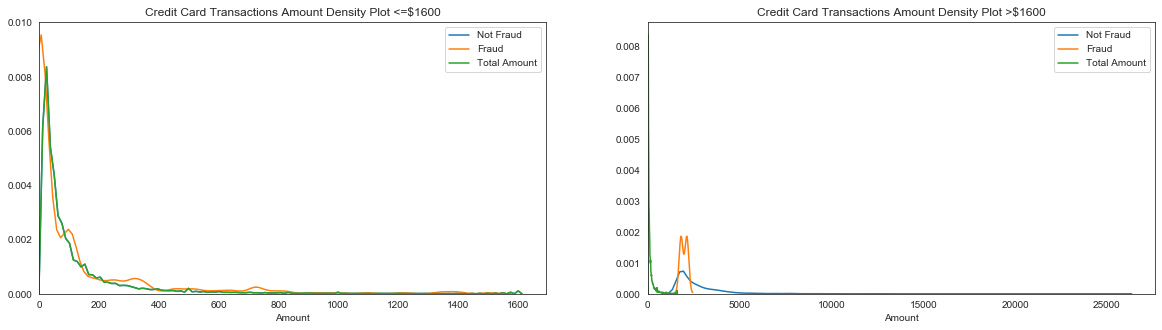

In [21]:
#fig,(ax1,ax2) = plt.subplots(ncols=3, figsize=(20,4))
plt.figure(figsize=(20,5))
plt.subplot(121)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount<=1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount<=1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]

sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot <=$1600')

plt.subplot(122)
class_0 = df.loc[ (df['Class'] == 0) & (df.Amount>1600) ]["Amount"]
class_1 = df.loc[ (df['Class'] == 1) & (df.Amount>1600) ]["Amount"]
class_All = df.loc[ (df.Amount<=1600) ]["Amount"]
sns.distplot(class_0,hist=False,rug=False,label='Not Fraud').set(xlim=0)
sns.distplot(class_1,hist=False,rug=False,label='Fraud')
sns.distplot(class_All,hist=False,rug=False,label='Total Amount')
plt.title('Credit Card Transactions Amount Density Plot >$1600')
plt.show()

#For <=$1600 fraud and non-fraud distribution is almost overlap. It mean any amount of transaction 
#can be fraud or non-fraud.
#For >$1600 there is some spike around $2500. It means transaction around $2500 are mose suspectible to be fraud.

#We need this field as well for prediction but we need to scale this as well.

Duration  6.931418000000008


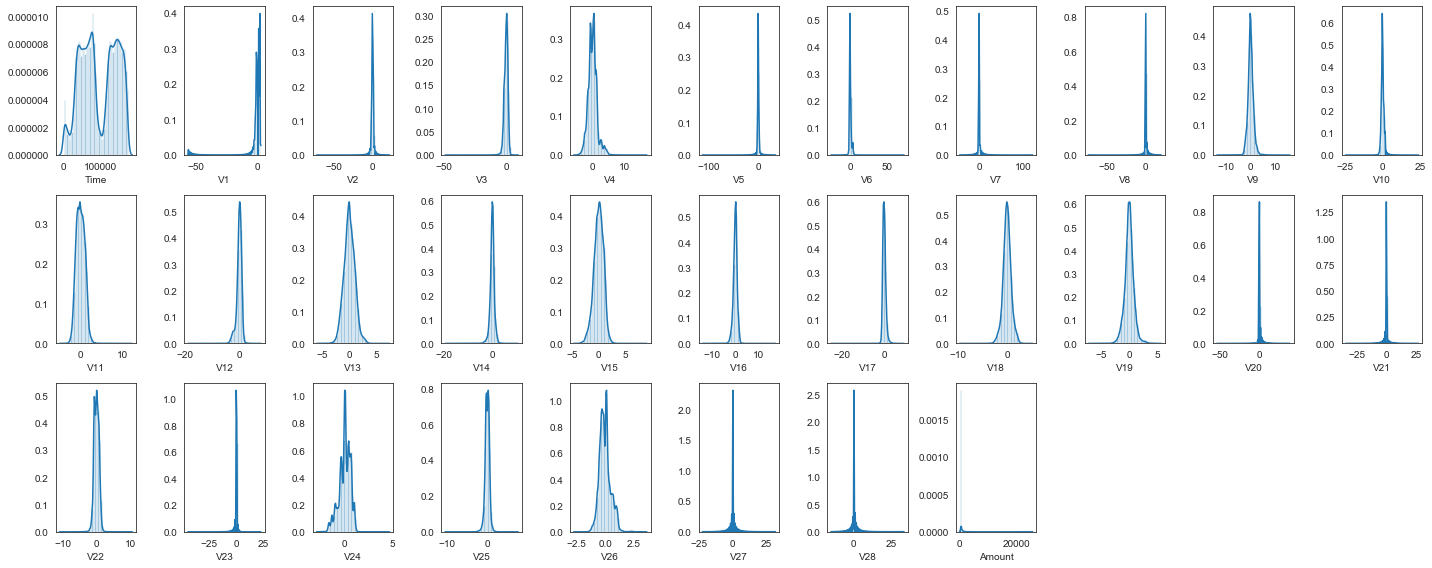

In [22]:
start = timer()
#Distribution of the data
plt.figure(figsize=(20,8))
i=1
for col in df.columns[0:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Except time and amount all fields looks having single peak bell curve. Allhough some of the fields are skwed right
#side and some looks skewed left side. So we can use power-transformer -yeo-johnson to handle this issue.

Here we will observe the distribution of our classes

In [23]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

amt=100*df.groupby("Class").sum()["Amount"] / sum(df.Amount)

print ("Normal Transaction {:.2f}  Fraud Transaction {:.2f}  ".format (classes[0],classes[1]))
print ("Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (normal_share,fraud_share))
print ("Value of Normal Transaction {:.2f}%  Fraud Transaction {:.2f}%  ".format (amt[0],amt[1]))

fraud_amt=df.loc[df['Class'] == 1]["Amount"]
print ("\nAverage Value {:.2f} Min Value {:.2f}  Max Value {:.2f} Fraud Transactions".format( np.average(fraud_amt), np.min(fraud_amt), np.max(fraud_amt)))

fraud_0amt_trans=len ( df.loc[  (df['Class'] == 1) & (df['Amount']==0)  ] )
print ("\n# Fraud Transactions of 0 Value = ",fraud_0amt_trans)

Normal Transaction 284315.00  Fraud Transaction 492.00  
Normal Transaction 99.83%  Fraud Transaction 0.17%  
Value of Normal Transaction 99.76%  Fraud Transaction 0.24%  

Average Value 122.21 Min Value 0.00  Max Value 2125.87 Fraud Transactions

# Fraud Transactions of 0 Value =  27


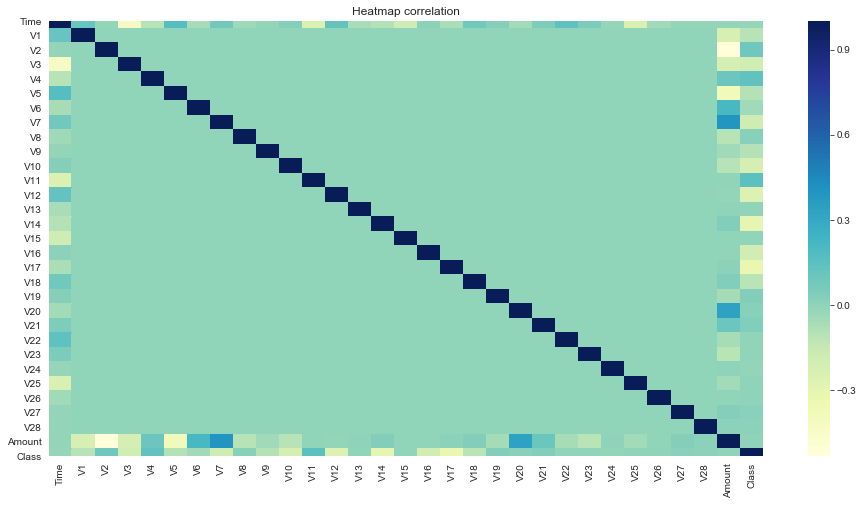

In [24]:
#Check Coorelation Between Different Variables
df_corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
#sns.set(font_scale=.5,style='white')

plt.title('Heatmap correlation')
plt.show()

#Since this is is PCA data it looks there is no relationship between the given variables. Except time and amount has
#some sort of relationship with other fields.

In [25]:
# Is there an relationship between variables and Class?
rank = pd.DataFrame(df_corr['Class']) #.sort_values(ascending=False)
rank['Relationship'] = rank.Class.apply(lambda x: "+" if x>0 else "-")
rank.Class=abs(rank.Class)
rank.rename(columns={"Class":"Degree"}, inplace=True)
rank.sort_values("Degree", ascending=False)

#Some variables show positive relationship with fraud and some negative. For example V17 & Fraud share share -ve
#relation. More the value of V17 lesser are the chances of this being fraud.
#V11 has +ve relationship. More the value of V11 more are the chances that transation is fraud.

,Degree,Relationship
Class,1.000000,+
V17,0.326481,-
V14,0.302544,-
V12,0.260593,-
V10,0.216883,-
V16,0.196539,-
V3,0.192961,-
V7,0.187257,-
V11,0.154876,+
V4,0.133447,+


#### <font color=red>Note 1: Because I don't have enough computing resources available (I tried nimblebox, google colab but that also too slow), therfore I am NOT using full given dataset for the model building.</font> </br>
#### <font color=red>Note 2: We need to have modular code to run same models with different parameters and differnt data imbalance treatment otherwise it will be extremely difficult to maintain the code. Therefore I have taken different approach. Which you can observer while scanning and running the code.
</font>

In [26]:
df.drop(columns="Amt", inplace=True) #This field was created for binning purpose so not required for modeling

In [33]:
#Training model on huge dataset taking too much time so taking 5% of data initially. 
#When code start working fine and start doing reasonable prediction disable below line
#If you have enough resources you can disable this cell

df = pd.concat([ df.sample(frac=.05, random_state=1),df.loc[df.Class==1] ])
print (df.shape)

(14732, 31)


Duration  2.2741761999999994


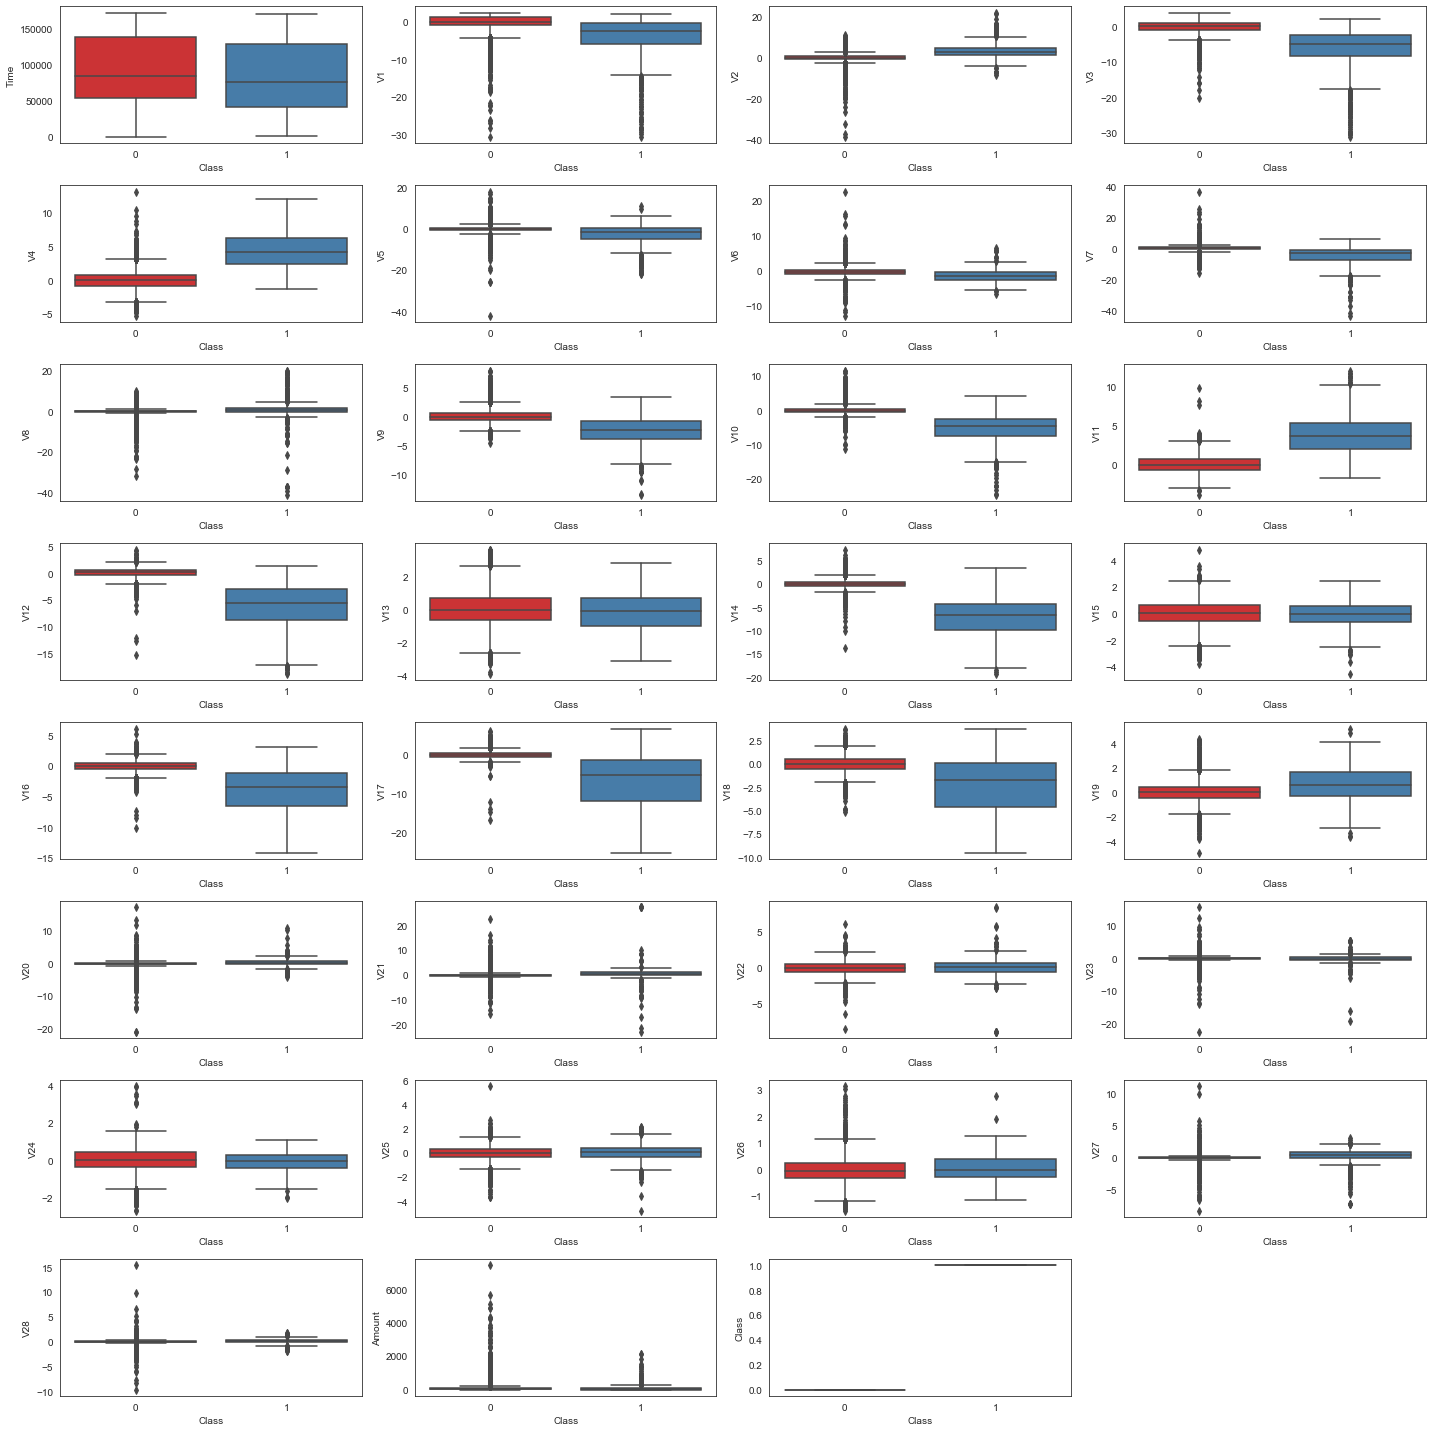

In [28]:
#Distribution of data acrros 2 Classes
start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha = 'center', va = 'center', 
                fontsize=8,
                xytext = (0, 10), textcoords = 'offset points')
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Almost all fields has outlier values.

Duration  34.89489609999998


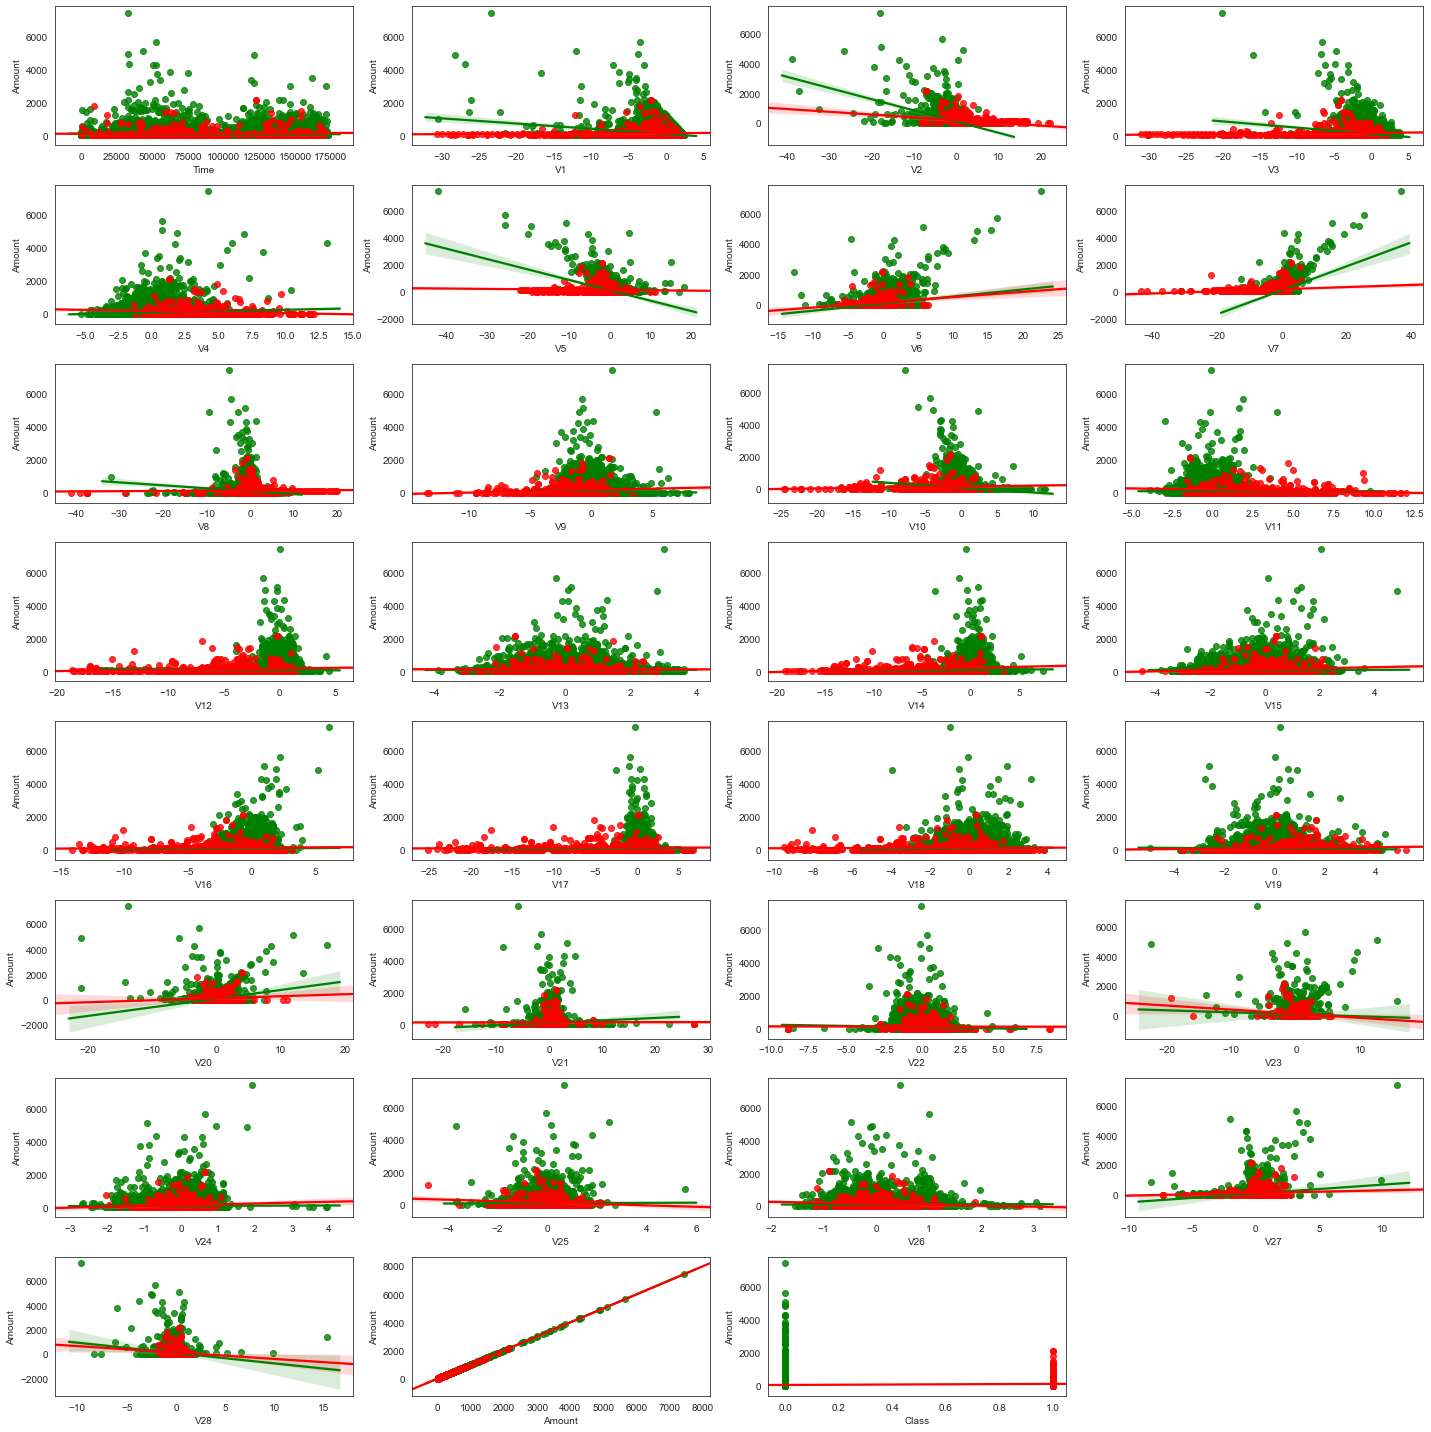

In [29]:
# Create a scatter plot to observe the distribution of classes with Amount
start=timer()

plt.figure(figsize=(20,20))
i=1
for col in df.columns:
    plt.subplot(8,4,i)
    
    sns.regplot(y=df[df.Class==0].Amount,x=df[df.Class==0][col], color="g")
    sns.regplot(y=df[df.Class==1].Amount,x=df[df.Class==1][col], color="r")
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#For most of the variables slope of amount field for fraud and non-fraud transaction is different. 
#For example v5 has -ve slop for non-fraud transactions and + slop for fraud transactions.

### Standard Scale All the Fields Including Time and Amount

In [34]:
cols2Scale = list(df.columns)
cols2Scale.remove("Class")

In [35]:
sc=StandardScaler()
t=sc.fit_transform(df[ cols2Scale ])
df[cols2Scale] = t
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.542165,-0.177345,-0.446889,0.030154,-0.228183,1.201262,-1.422117,0.234010,-0.295085,0.343262,0.150528,-0.750772,0.442264,0.619634,0.068656,-0.674005,-0.107599,-0.199274,-0.783185,-0.269573,-0.255168,-0.100090,0.054402,0.560594,0.045778,-4.178695,-0.439237,0.128913,0.621116,-0.366883,0
127467,-0.331670,-0.259693,0.624082,0.666552,-0.079212,-0.088448,-0.441464,0.248051,0.245784,-0.502037,-0.242045,-0.021675,0.537761,0.781292,0.330012,1.039792,0.031051,0.182048,-0.842735,-0.591388,-0.023590,-0.150447,-0.484577,0.126908,0.671032,-0.483813,0.140878,0.323596,0.174706,-0.366102,0
137900,-0.246697,-0.058260,0.521235,0.511859,-0.170388,0.387885,-0.354232,0.433936,-0.036744,-0.310330,-0.199713,-0.719470,0.187087,1.134460,-0.245658,0.938807,0.546127,-0.063311,0.090487,0.221716,0.242750,-0.317123,-1.013192,-0.193848,-0.813582,-0.025858,0.225411,0.499397,0.265961,-0.370581,0
21513,-1.311793,-0.468064,0.469844,0.858443,-1.025369,0.004749,-0.300565,0.422154,-0.017949,0.363467,0.305515,0.598643,-0.041322,-1.323179,0.120019,0.227397,0.685182,-0.409017,0.399852,-0.181219,0.378720,-0.237372,-0.550239,-0.366248,0.023474,0.447355,1.651165,0.194458,-0.001208,-0.308567,0
134700,-0.277369,0.588818,0.264123,-0.154097,0.424096,0.104763,-1.028762,0.273245,-0.162085,-0.009051,-0.298171,-0.017832,-0.132346,-0.625392,-0.554585,1.122121,0.540382,0.669377,0.376720,-0.458005,-0.142779,-0.180186,-0.565064,-0.123361,0.435239,1.049465,0.738112,-0.075573,0.125718,-0.371115,0


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,14732.0,-4.646779e-17,1.000034,-1.978474,-0.849607,-0.210434,0.946203,1.653384
V1,14732.0,-6.039457e-17,1.000034,-12.324738,-0.327370,0.051949,0.597035,1.049218
V2,14732.0,-5.912897e-17,1.000034,-19.890465,-0.350989,-0.008073,0.386491,11.256507
V3,14732.0,4.837745e-16,1.000034,-13.287414,-0.341948,0.156732,0.534379,1.783252
V4,14732.0,-1.708517e-16,1.000034,-3.206814,-0.572477,-0.069034,0.395687,7.670043
V5,14732.0,-1.616576e-16,1.000034,-23.426401,-0.348161,0.024155,0.403421,10.168539
V6,14732.0,1.666145e-17,1.000034,-9.096731,-0.539360,-0.178573,0.307275,16.203026
V7,14732.0,2.214003e-16,1.000034,-20.953869,-0.198978,0.099392,0.358163,17.814875
V8,14732.0,1.264563e-17,1.000034,-23.148860,-0.117662,0.018177,0.197899,11.283861
V9,14732.0,-2.544726e-16,1.000034,-10.626995,-0.500331,0.009385,0.534383,6.371375


### Plotting the distribution of a variable- After Scaling

Duration  3.497802500000006


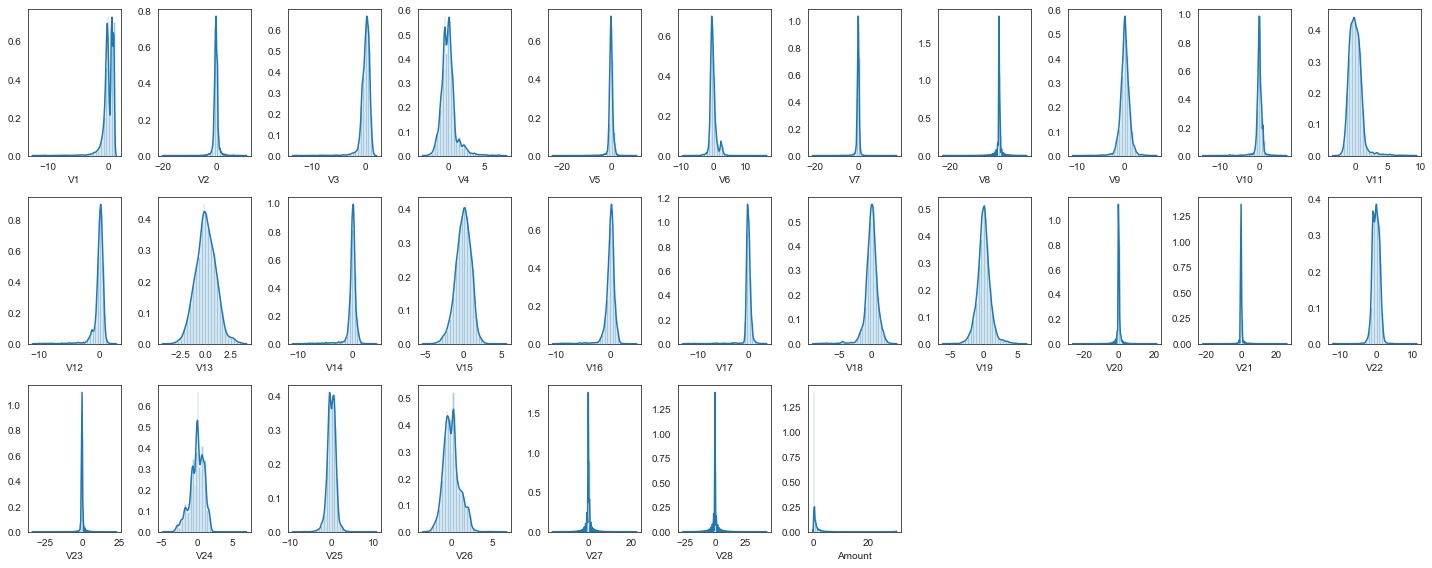

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

### Some fields are still skewed. So using PowerTransformer to fix that issue.
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [36]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
#'yeo-johnson’ [1], works with positive and negative values
#‘box-cox’ [2], only works with strictly positive values

df[cols2Scale] = power_transform(df[cols2Scale], method='yeo-johnson')

### Plotting the distribution of a variable- After Correcting Skweness Issue

Duration  3.261291799999981


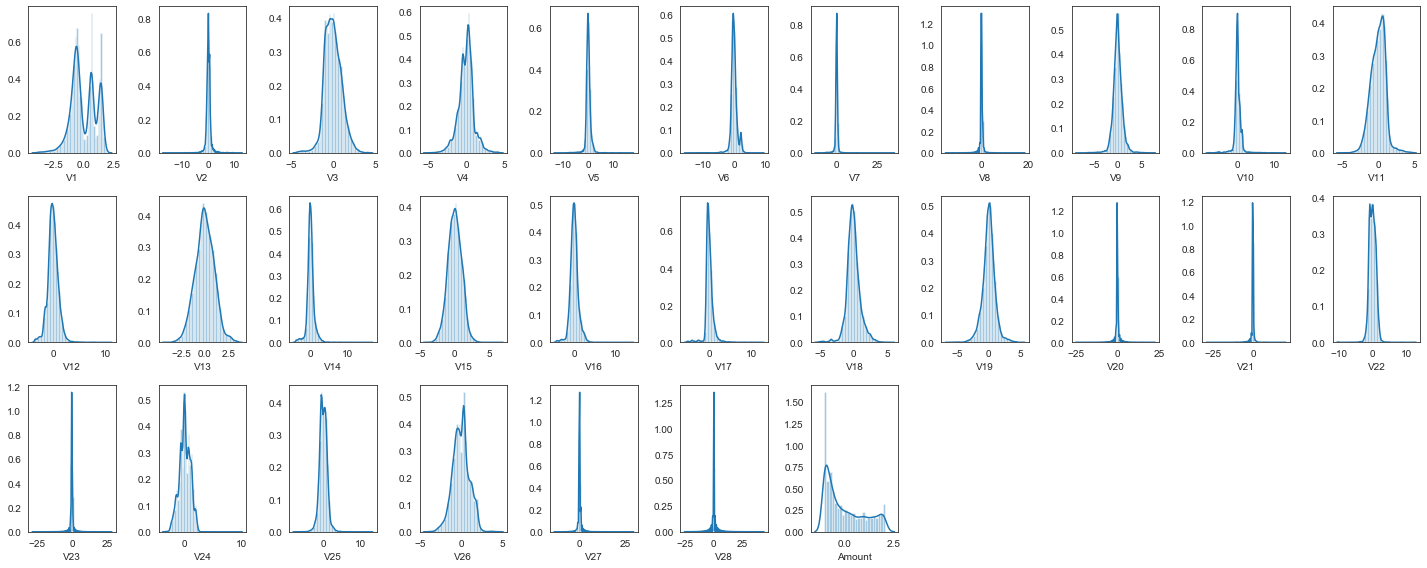

In [9]:
# Re-plot the histogram of a variable from the dataset to see the skewness
#Distribution of the data
start=timer()

plt.figure(figsize=(20,8))
i=1
for col in df.columns[1:30]:
    plt.subplot(3,11,i)
    sns.distplot(df[col])
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start) 

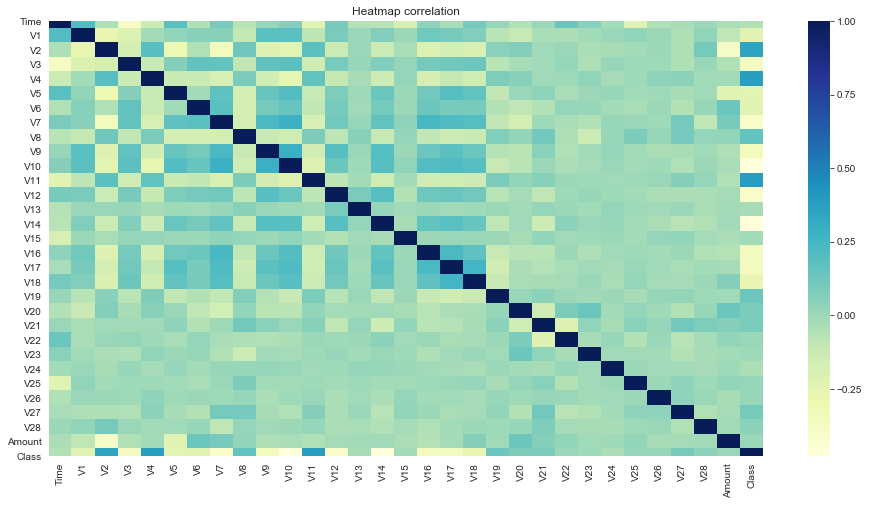

In [25]:
#Re-Check Coorelation Between Different Variables
df_corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
#sns.set(font_scale=.5,style='white')

plt.title('Heatmap correlation')
plt.show()

#Since this is is PCA data it looks there is no relationship between the given variables. Except time and amount has
#some sort of relationship with other fields.

### Check the outliers after fixing skewness & scale issue

Duration  1.8325073000000032


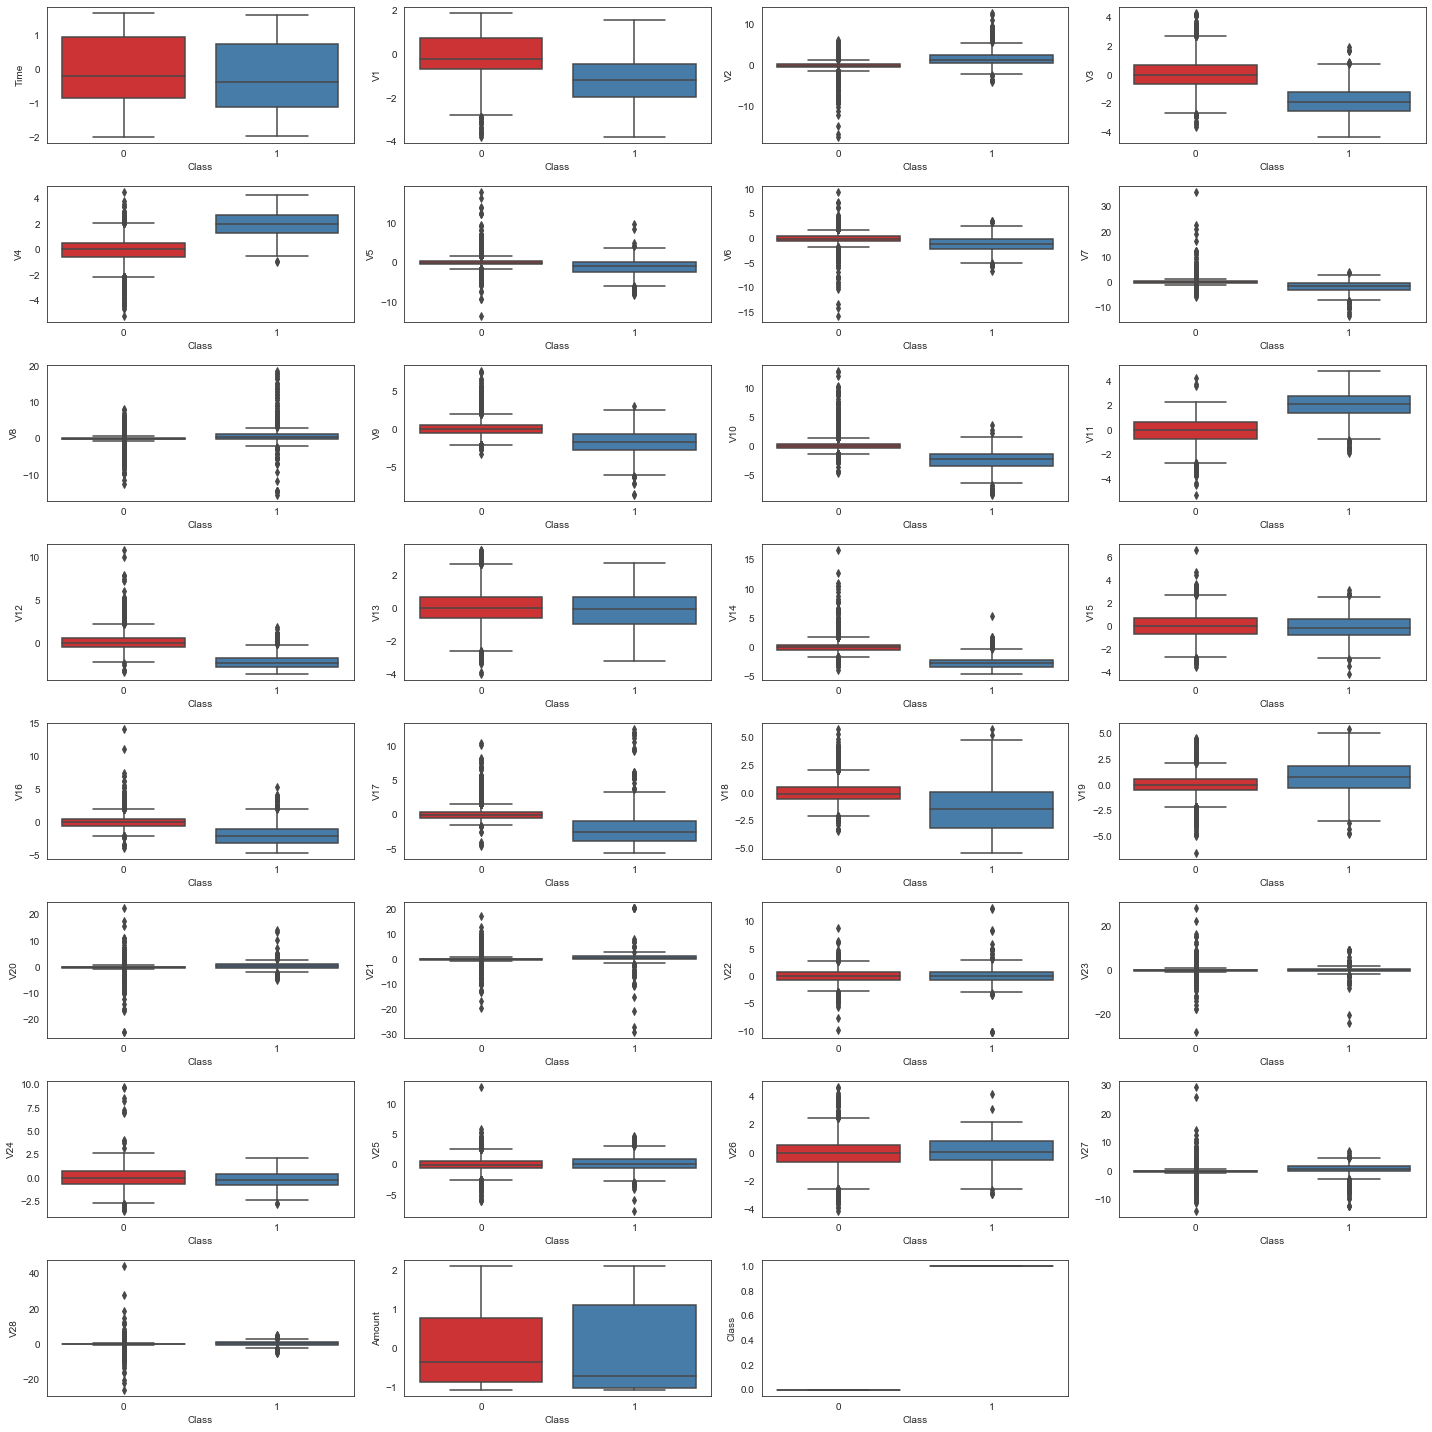

In [26]:
#Distribution of data acrros 2 Classes
start=timer()

color = sns.color_palette("Set1", 6)
plt.figure(figsize=(20,20))
i=1

for col in df.columns:
    plt.subplot(8,4,i)
    ax=sns.boxplot(x=df['Class'],y=df[col],  palette=color)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), ha = 'center', va = 'center', 
                fontsize=8,
                xytext = (0, 10), textcoords = 'offset points')
    i+=1
plt.tight_layout()

end = timer()
print("Duration ",end - start)

#Many ields still has outlier values.

# <font color=blue> Section 2: Splitting the data into Train & Test

In [37]:
X= df.drop(columns=["Class"], axis=0)
y= df.Class #class variable

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)

In [38]:
ros = over_sampling.RandomOverSampler(random_state=100)
X_train_ros, y_train_ros       = ros.fit_resample(X_train1, y_train1)
X_test_ros,  y_test_ros        = ros.fit_resample(X_test1, y_test1)

smt = over_sampling.SMOTE(random_state=100)
X_train_smote, y_train_smote   = smt.fit_resample(X_train1, y_train1)
X_test_smote,  y_test_smote    = smt.fit_resample(X_test1, y_test1)

ada = over_sampling.ADASYN(random_state=100)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
X_test_adasyn,  y_test_adasyn  = ada.fit_resample(X_test1, y_test1)

# <font color=blue> Section 3: Select the Dataset Imbalancing Method</font>
Before you proceed for Section 4 this shall be done. It means every time you want to choose different imbalancing method you should start from here

## <font color=red> WARNING!!! Before you goto Section 4, Select which type of data you want to use for model.</font>

In [656]:
model_with_data_list=['Normal','RandomOverSampler','Smote','AdaSyn']
option=-1
while not (option>=0 and option<=3):
    i = input('0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn ')
    try:
        option=int(i)
    except:
        option=-1    


if option==0:
    X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)
elif option==1:
    X_train, X_test, y_train, y_test = X_train_ros, X_test_ros, y_train_ros , y_test_ros
elif option==2:
    X_train, X_test, y_train, y_test = X_train_smote, X_test_smote, y_train_smote , y_test_smote
elif option==3:
    X_train, X_test, y_train, y_test = X_train_adasyn, X_test_adasyn, y_train_adasyn , y_test_adasyn


print ("\n\nRunning Model with ",model_with_data_list[option]," Data")




Running Model with  AdaSyn  Data


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [565]:
print(np.sum(y_train) + np.sum(y_test))
print(np.sum(y_train))
print(np.sum(y_test))

14210
10658
3552


# <font color=blue> Section 4: Model Building </font>

In [566]:
# Plotting cv results
def draw_cv_results(cv_df, param_name, metric_name, title_name, log_true):
    plt.figure(figsize=(10,4))
    
    if log_true:
        x_axis= np.log10( list(cv_df[param_name]))
        x_axis_title = "Log Value "+param_name
    else:
        x_axis = list(cv_df[param_name])
        x_axis_title = param_name
        
    plt.plot( x_axis, cv_df['mean_train_score'] )
    plt.plot( x_axis, cv_df['mean_test_score'] )
    plt.xlabel(x_axis_title)
    plt.ylabel(metric_name)
    plt.title(title_name)
    plt.legend(['Train ' + metric_name +' score', 'Test ' +metric_name+' score'], loc='upper left')


In [567]:
# Function to plot the confusion Matrix
def draw_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.tab10):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
   
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = 'd' 
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.fill(j,i,facecolor="red" if cm[i, j] < thresh else "blue", edgecolor='b', linewidth=2)
        #plt.Rectangle((0, 0), 1, 0, linewidth=1, edgecolor='b', facecolor='none')
        
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, weight="bold", 
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white", 
                 
                bbox=dict(facecolor='red', alpha=0.8))

    plt.tight_layout()
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

In [568]:
class_names=[0,1]
def draw_roc( actual, probs, prob_values=True, Threshold_limit=0.5 ):
  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                          drop_intermediate = False )
    
    threshold = thresholds[np.argmax(tpr-fpr)]

    if prob_values:
        pred= probs.map(lambda x: 1 if x > threshold else 0)
    else:
        pred= probs
        
    auc_score = round( metrics.roc_auc_score( actual, probs) ,2)
    
    recall    = round( metrics.recall_score(actual,pred),2)
    precision = round(metrics.precision_score(actual, pred),2)
    f1= round(metrics.f1_score(actual,pred),2)
    print ("This Model Result is for ", model_with_data_list[option], " Data")
    print ("ROC AUC Score on Test:",auc_score," Threshold:{:.5f}".format(threshold))

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic example',fontsize=20)
    plt.legend(loc="lower right")
    
    plt.subplot(1,2,2)
    cm = confusion_matrix(actual, pred)
    draw_confusion_matrix(cm,class_names)
    plt.show()

    return auc_score,recall,precision,f1

In [569]:
X_train.shape, y_train.shape

((21323, 30), (21323,))

### Model 1: Logistic Regression

In [570]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

    lr = LogisticRegression(max_iter=1000, random_state=100)
    lr.fit(X_train, y_train)      

    model_cv_logistic = GridSearchCV(estimator=lr, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_logistic.fit(X_train,  y_train)

    cv_results_lr = pd.DataFrame(model_cv_logistic.cv_results_)
    print(cv_results_lr)
    
end = timer()
print("Duration ",end - start)

Duration  0.0001947999990079552


In [571]:
if run_cv:
    draw_cv_results(cv_results_lr, 'param_C', 'ROC AUC', 'Optimal C', True)

In [572]:
if run_cv:
    model_cv_logistic.best_estimator_

In [573]:
#There are 29 variables in X_train. Let's see can we manage good result with lessor variables.
if option==0 or option==1:
    lr = LogisticRegression(C=.1,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for normal
elif option==2:
    lr = LogisticRegression(C=10,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for smote
else:
    lr = LogisticRegression(C=100,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for adasyn
rfe = RFE(lr,15) #Identify top 15 important variables
rfe.fit(X_train,y_train)
useful_cols = X_train.columns[rfe.support_]
print ("Useful Columns: " ,useful_cols)

Useful Columns:  Index(['Time', 'V3', 'V4', 'V6', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14', 'V15',
       'V16', 'V17', 'V22', 'V23'],
      dtype='object')


In [574]:
#check the ranking of these variables
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95  Threshold:0.40770


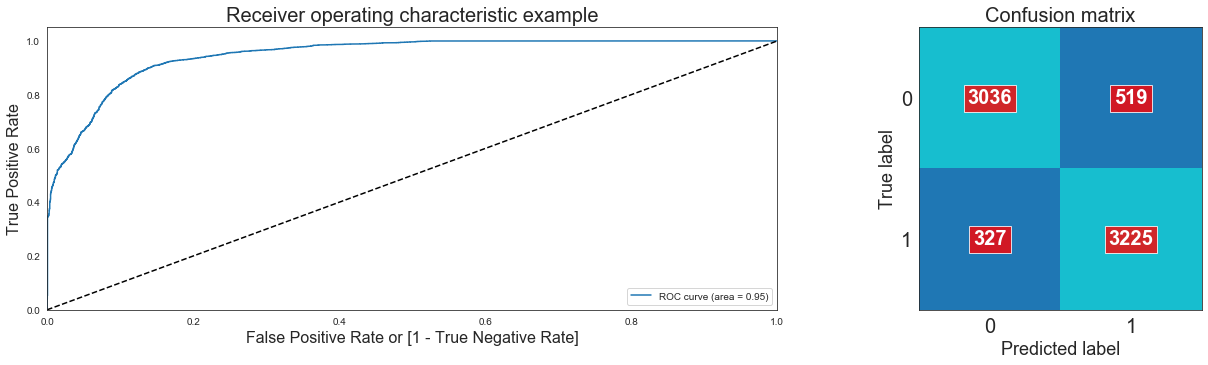

In [575]:
#Hyperparameter Turning of LogisticRegression
#Train the model with only 15 variables (identified in earlier step)

X_train_= X_train[useful_cols]
X_test_ = X_test[useful_cols]
lr = LogisticRegression(C=.1,max_iter=1000, random_state=100)
lr.fit(X_train_,y_train)

y_test_pred_logistic = lr.predict_proba(X_test_)
y_test_pred_logistic = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_logistic[:,1:2].reshape(-1) })

#check ROC_AUC Score on Test
logistic_auc_test, logistic_recall_test, logistic_precision_test, logistic_f1_test = \
                        draw_roc(y_test_pred_logistic.Class, y_test_pred_logistic.Class_Prob, True)

### Model 2: GLM

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95  Threshold:0.39305


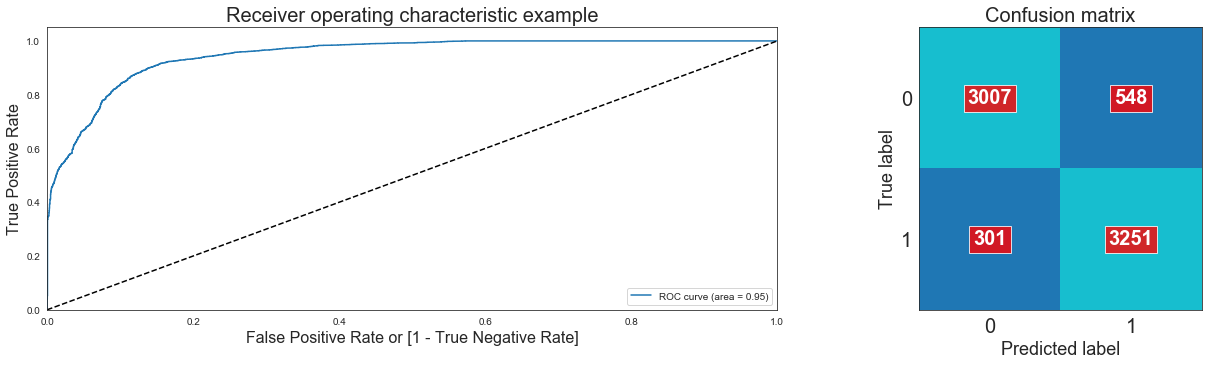

In [576]:
X_train_sm = sm.add_constant(X_train[useful_cols])
glm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
glm = glm.fit()

X_test_sm = sm.add_constant(X_test_)
y_test_pred_glm = glm.predict( X_test_sm  )
y_test_pred_glm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_glm })

#check ROC_AUC Score on Test
glm_auc_test, glm_recall_test, glm_precision_test, glm_f1_test = \
                        draw_roc(y_test_pred_glm.Class, y_test_pred_glm.Class_Prob)

In [577]:
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                21323
Model:                            GLM   Df Residuals:                    21307
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 30 Mar 2020   Deviance:                          nan
Time:                        19:10:32   Pearson chi2:                 4.50e+15
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6166      0.032    -50.209      0.000      -1.680      -1.554
Time          -0.4773      0.033    -14.346      0.000      -0.543      -0.412
V3            -0.8304      0.037    -22.595      0.000      -0.902      -0.758
V4             2.0383      0.042     48.041      0.000       1.955       2.121
V6            -0.3664      0.034    -10.742      0.000      -0.433      -0.300
V8            -1.1932      0.054    -22.032      0.000      -1.299      -1.087
V9            -0.4913      0.036    -13.807      0.000      -0.561      -0.422
V10           -1.6657      0.052    -31.825      0.000      -1.768      -1.563
V11            0.8350      0.034     24.617      0.000       0.769       0.902
V12           -1.4136      0.043    -32.921      0.000      -1.498      -1.329
V14           -2.0650      0.047    -43.860      0.000      -2.157      -1.973
V15           -0.4675      0.026    -18.325      0.000      -0.517      -0.417
V16           -0.7220      0.036    -19.978      0.000      -0.793      -0.651
V17           -0.8121      0.048    -17.018      0.000      -0.906      -0.719
V22            0.4633      0.028     16.627      0.000       0.409       0.518
V23           -0.4079      0.020    -20.183      0.000      -0.448      -0.368
==============================================================================
"""

### Model 3: KNeighborsClassifier

In [578]:
# Cross validation using different values of n_neighbors.
start=timer()

if run_cv:
    hyper_params = [{'n_neighbors': range(2,15,2) }]
    knn = KNeighborsClassifier()
    model_cv_knn = GridSearchCV(estimator=knn, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_knn.fit(X_train,  y_train)

    cv_results_knn = pd.DataFrame(model_cv_knn.cv_results_)
    print(cv_results_knn.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

Duration  0.00011159999849041924


In [579]:
if run_cv:
    draw_cv_results(cv_results_knn, 'param_n_neighbors', 'ROC AUC', 'Optimal n_neighbours', False)

In [580]:
if run_cv:
    print(model_cv_knn.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.84  Threshold:0.25000


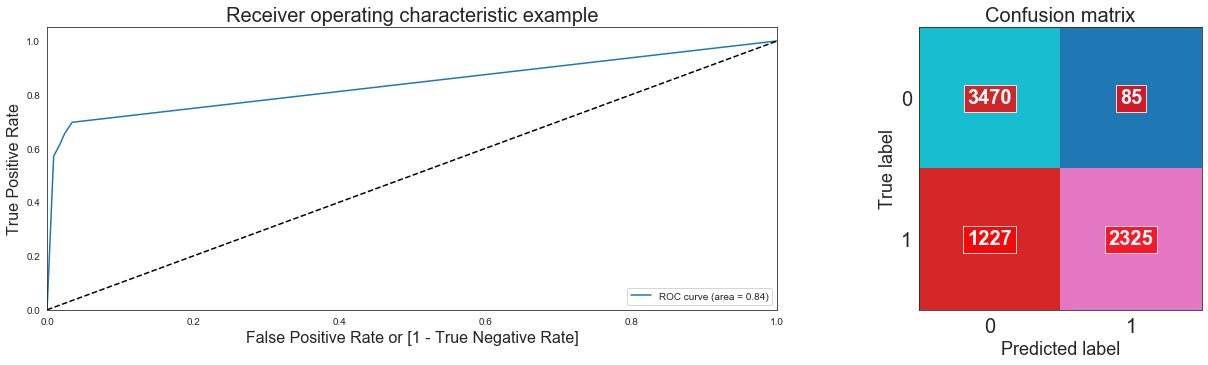

In [581]:
#Hyperparameter Turning of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, leaf_size=30, p=2)
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict_proba(X_test)

y_test_pred_knn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_knn[:,1:2].reshape(-1) })


knn_auc_test, knn_recall_test, knn_precision_test,knn_f1_test = \
                        draw_roc(y_test_pred_knn.Class, y_test_pred_knn.Class_Prob)


### Model 4: RandomForestClassifier

In [582]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

    hyper_params=[{'n_estimators':range(4,20,2),'max_depth':range(8,25,2)}]

    rfc = RandomForestClassifier()
    model_cv_rfc = GridSearchCV(estimator=rfc, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_rfc.fit(X_train,  y_train)

    cv_results_rfc = pd.DataFrame(model_cv_rfc.cv_results_)
    print(cv_results_rfc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

Duration  0.00020869999934802763


In [583]:
if run_cv:
    cv_results_rfc.param_max_depth = cv_results_rfc.param_max_depth.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_rfc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators', y='mean_train_score', hue='param_max_depth',data=cv_results_rfc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [584]:
if run_cv:
    print(model_cv_rfc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.96  Threshold:0.35236


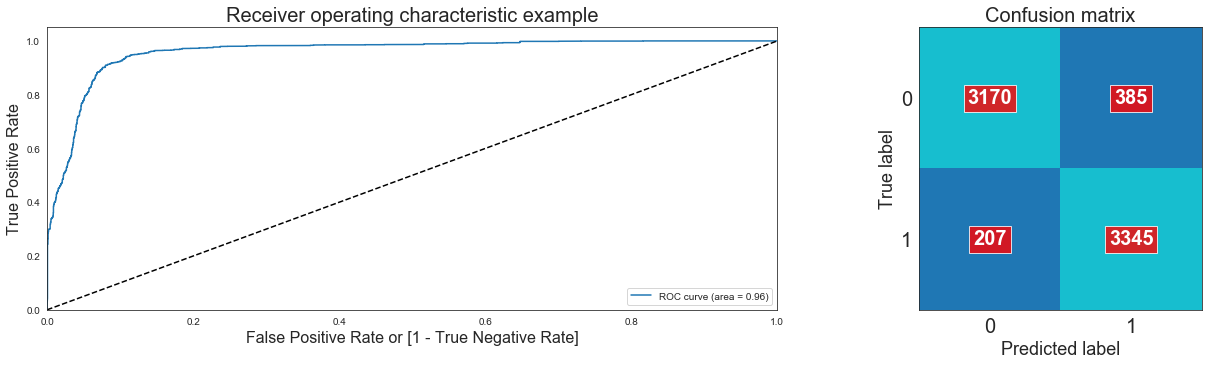

In [585]:
#Optimised Hyper Parameters
rfc= RandomForestClassifier(n_estimators=16, criterion="gini", max_depth=6, random_state=100)
rfc.fit(X_train,y_train)
y_test_pred_rfc = rfc.predict_proba(X_test)[:,1:2]

y_test_pred_rfc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_rfc.reshape(-1) })

rfc_auc_test, rfc_recall_test, rfc_precision_test, rfc_f1_test = \
                        draw_roc(y_test_pred_rfc.Class, y_test_pred_rfc.Class_Prob)

### Model 5: DecisionTreeClassifier

In [586]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()

if run_cv:
    hyper_params=[{'max_depth': range(10,20,2),
               'min_samples_leaf': range(1, 5, 1),
               'min_samples_split': range(1, 5, 1) }]

    dtc = DecisionTreeClassifier(random_state=100)
    model_cv_dtc = GridSearchCV(estimator=dtc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_dtc.fit(X_train,  y_train)

    cv_results_dtc = pd.DataFrame(model_cv_dtc.cv_results_)
    print(cv_results_dtc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

Duration  0.00011499999891384505


In [587]:
if run_cv:
    cv_results_dtc.param_max_depth = cv_results_dtc.param_max_depth.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,4,1)
    ax1=sns.lineplot(x='param_min_samples_leaf', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,2)
    ax2= sns.lineplot(x='param_min_samples_leaf', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")

    plt.subplot(1,4,3)
    ax1=sns.lineplot(x='param_min_samples_split', y='mean_test_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,4,4)
    ax2= sns.lineplot(x='param_min_samples_split', y='mean_train_score', hue='param_max_depth',data=cv_results_dtc, ci=0)
    ax2.set_title("Train AUC Score")
    plt.show()

In [588]:
if run_cv:
    print(model_cv_dtc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.79  Threshold:0.96521


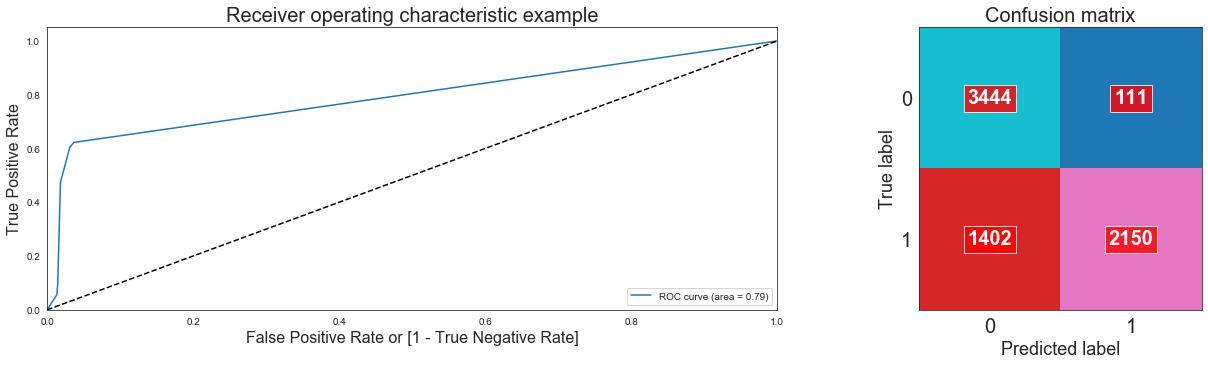

In [589]:
#Optimised Hyper Parameters
dtc= DecisionTreeClassifier(max_depth=16, min_samples_leaf=1, min_samples_split=2, random_state=100)

dtc.fit(X_train,y_train)
y_test_pred_dtc = dtc.predict_proba(X_test)[:,1:2]

y_test_pred_dtc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dtc.reshape(-1) })

dtc_auc_test, dtc_recall_test, dtc_precision_test, dtc_f1_test = \
                        draw_roc(y_test_pred_dtc.Class, y_test_pred_dtc.Class_Prob, True)


### Model 6: LGBM

In [590]:
# Cross validation using different values of n_estimators.
start=timer()
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    lgbm_clf = lgbm.LGBMClassifier(random_state=100)
    model_cv_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_lgbm.fit(X_train,  y_train)

    cv_results_lbgm = pd.DataFrame(model_cv_lgbm.cv_results_)
    cv_results_lbgm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Duration  0.00011870000162161887


In [591]:
if run_cv:
    draw_cv_results(cv_results_lbgm, 'param_n_estimators', 'ROC AUC', 'Optimal n_estimator', False)

In [592]:
if run_cv:
    print(model_cv_lgbm.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.98  Threshold:0.01238


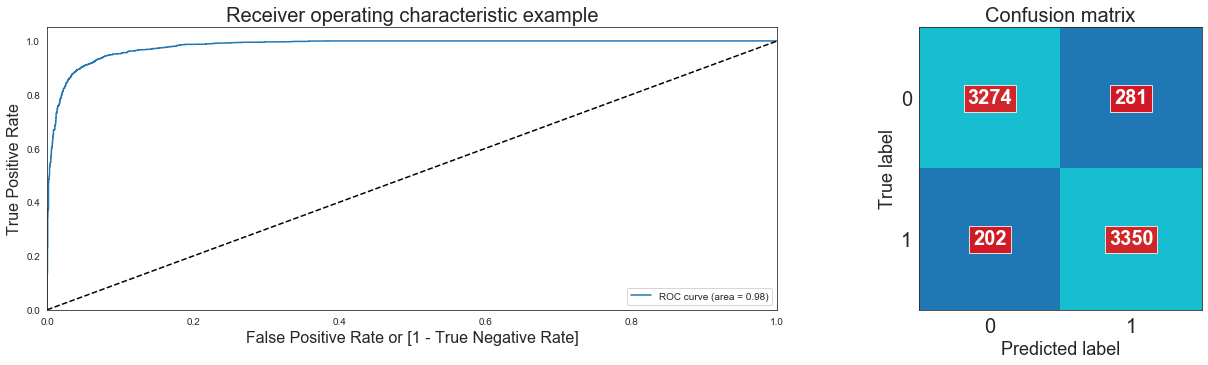

In [658]:
# Optimized Hyper Paramters.
lgbm_clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42)

lgbm_clf.fit(X_train,y_train)
y_test_pred_lgbm = lgbm_clf.predict_proba(X_test)[:,1:2]

y_test_pred_lgbm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_lgbm.reshape(-1) })

lgbm_auc_test, lgbm_recall_test, lgbm_precision_test, lgbm_f1_test = \
                        draw_roc(y_test_pred_lgbm.Class, y_test_pred_lgbm.Class_Prob,True,.5)

### Model 7: Perceptron

In [594]:
# Cross validation using different values of n_iter_no_change
start=timer()
if run_cv:
    hyper_params=[{'n_iter_no_change': [ 5,6,7,8,9] }]

    percept = Perceptron(random_state = 42)
    model_cv_percept = GridSearchCV(estimator=percept, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_percept.fit(X_train,  y_train)

    cv_results_percept = pd.DataFrame(model_cv_percept.cv_results_)
    cv_results_percept.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

Duration  0.00011450000238255598


In [595]:
if run_cv:
    draw_cv_results(cv_results_percept, 'param_n_iter_no_change', 'ROC AUC', 'Optimal n_estimator', False)

In [596]:
if run_cv:
    print(model_cv_percept.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89  Threshold:1.00000


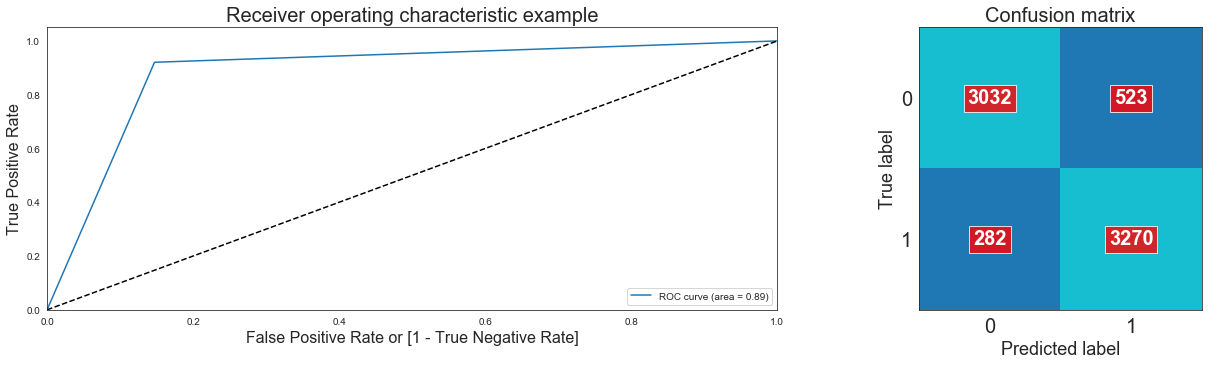

In [597]:
# Optmized Hyper Parameter
percept = Perceptron(alpha=.00001,n_iter_no_change=7,random_state = 42, penalty="l2")

percept.fit(X_train,y_train)
y_test_pred_percept = percept.predict(X_test)#[:,1:2]

y_test_pred_percept = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_percept.reshape(-1) })

percept_auc_test, percept_recall_test, percept_precision_test, percept_f1_test = \
                        draw_roc(y_test_pred_percept.Class, y_test_pred_percept.Class_Prob, False)

### Model 8: SVM

In [598]:
#hyper_params=[{'C': range(1,30,1) }]
start=timer()
if run_cv:
    hyper_params=[{'C': range(10,30,2) }]

    svm = SVC(random_state = 100)
    model_cv_svm = GridSearchCV(estimator=svm, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_svm.fit(X_train,  y_train)

    cv_results_svm = pd.DataFrame(model_cv_svm.cv_results_)
    cv_results_svm.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

Duration  0.00010539999857428484


In [599]:
if run_cv:
    draw_cv_results(cv_results_svm, 'param_C', 'ROC AUC', 'Optimal n_estimator', False)

In [600]:
if run_cv:
    print(model_cv_svm.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.94  Threshold:0.00004


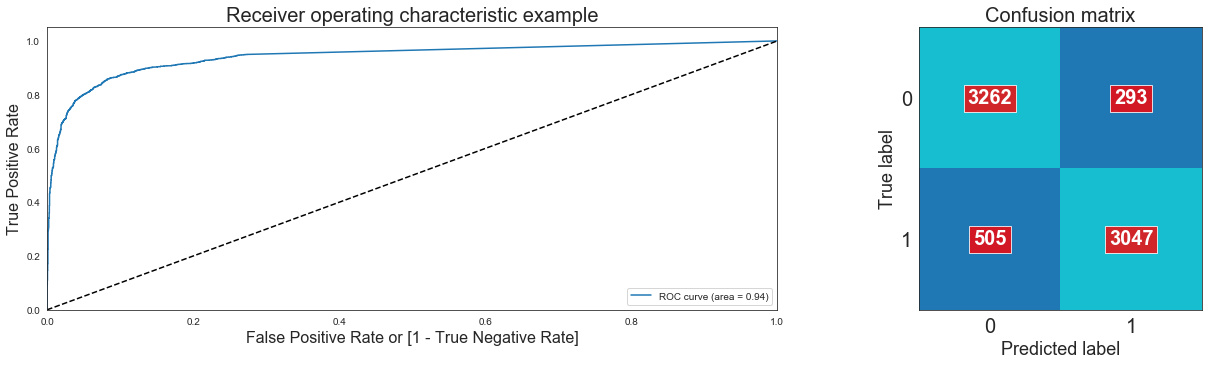

In [601]:
#Optimized Hyper Parameters
svmc = svm.SVC(C=20.0,random_state=100, probability=True).fit(X_train,y_train)
y_test_pred_svm = svmc.predict(X_test)
y_test_pred_svm = svmc.predict_proba(X_test)[:,1:2]
y_test_pred_svm = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_svm.reshape(-1) })

svm_auc_test, svm_recall_test, svm_precision_test, svm_f1_test = \
                        draw_roc(y_test_pred_svm.Class, y_test_pred_svm.Class_Prob, True)

### Model 9: XGBoost

In [602]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params=[{'max_depth': range(10,15,1), 'n_estimators': range(95,120,2) }]

    xgb_clf = xgb(random_state = 100)
    model_cv_xgb = GridSearchCV(estimator=xgb_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_xgb.fit(X_train,  y_train)

    cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
    cv_results_xgb.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

Duration  0.0001801999969757162


In [603]:
if run_cv:
    cv_results_xgb.param_max_depth = cv_results_xgb.param_max_depth.astype("float")
    cv_results_xgb.param_n_estimators = cv_results_xgb.param_n_estimators.astype("float")
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_max_depth', data=cv_results_xgb)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_max_depth',data=cv_results_xgb)
    ax2.set_title("Train AUC Score")
    plt.show()

In [604]:
if run_cv:
    print(model_cv_xgb.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95  Threshold:0.49723


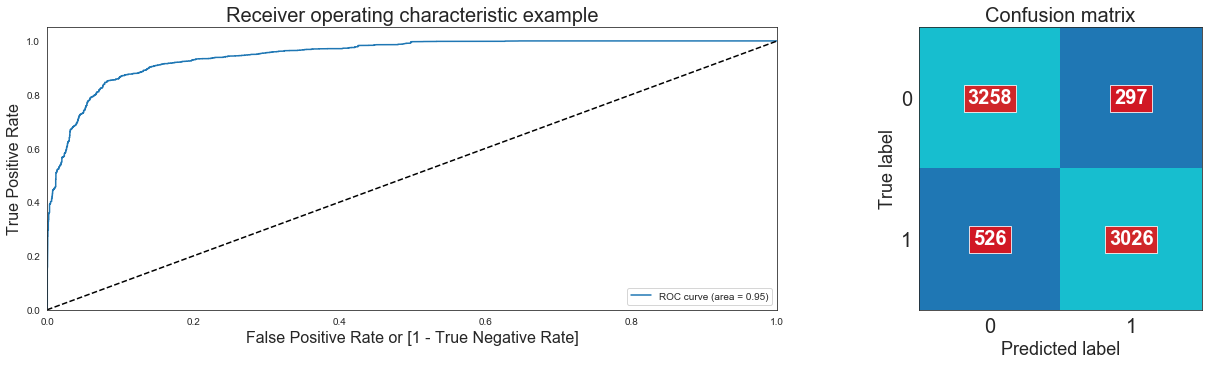

In [605]:
#Optimized Hyper Parameters
xgb_clf = xgb(max_depth=10, n_estimators=95, learning_rate=.01,random_state=100).fit(X_train,y_train)
y_test_pred_xgb = xgb_clf.predict_proba(X_test)[:,1:2]
y_test_pred_xgb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_xgb.reshape(-1) })

xgb_auc_test, xgb_recall_test, xgb_precision_test, xgb_f1_test = \
                        draw_roc(y_test_pred_xgb.Class, y_test_pred_xgb.Class_Prob, True)

### Modle 9: Adaboost

In [606]:
#Cross Validation
sart=timer()
if run_cv:
    hyper_params=[{'learning_rate': range(1,5,1), 'n_estimators': range(40,71,10) }]

    adbc = AdaBoostClassifier(random_state = 100)
    model_cv_adbc = GridSearchCV(estimator=adbc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_adbc.fit(X_train,  y_train)

    cv_results_adbc = pd.DataFrame(model_cv_adbc.cv_results_)
    print(cv_results_adbc.sort_values('rank_test_score'))
    
end = timer()
print("Duration ",end - start)

Duration  24.839485199998308


In [607]:
if run_cv:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    cv_results_adbc.param_n_estimators = cv_results_adbc.param_n_estimators.astype("float")
    cv_results_adbc.param_learning_rate = cv_results_adbc.param_learning_rate.astype("float")
    
    ax1=sns.lineplot(x='param_n_estimators',  y='mean_test_score', hue='param_learning_rate', data=cv_results_adbc)
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x='param_n_estimators',  y='mean_train_score', hue='param_learning_rate',data=cv_results_adbc)
    ax2.set_title("Train AUC Score")
    plt.show()

In [608]:
if run_cv:
    print(model_cv_adbc.best_estimator_)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.95  Threshold:0.49880


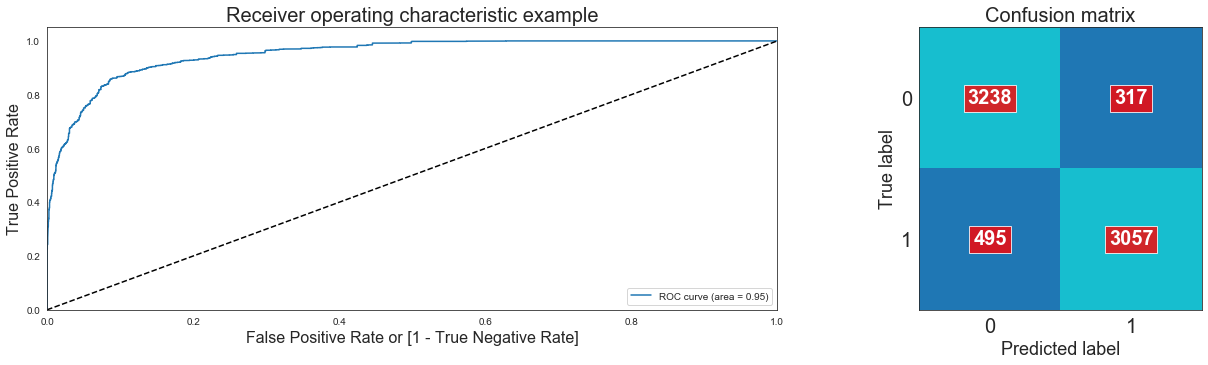

In [609]:
# Optimized Hyper Parameters
adbc = AdaBoostClassifier(learning_rate=1,random_state=100)
adbc.fit(X_train,y_train)

y_test_pred_adbc = adbc.predict_proba(X_test)[:,1:2]
y_test_pred_adbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_adbc.reshape(-1) })

adbc_auc_test, adbc_recall_test, adbc_precision_test, adbc_f1_test = \
                        draw_roc(y_test_pred_adbc.Class, y_test_pred_adbc.Class_Prob,True,.5)

In [610]:
adbc

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=100)

### Modle 10: CatboostClassifier

In [611]:
# Optimized Hyper Parameters
catb_clf = CatBoostClassifier(learning_rate=1,random_state=100)
catb_clf.fit(X_train,y_train)

0:	learn: 0.3242346	total: 31.8ms	remaining: 31.8s
1:	learn: 0.2439783	total: 61.8ms	remaining: 30.9s
2:	learn: 0.1643081	total: 92.3ms	remaining: 30.7s
3:	learn: 0.1325041	total: 123ms	remaining: 30.7s
4:	learn: 0.1154277	total: 153ms	remaining: 30.5s
5:	learn: 0.0992203	total: 190ms	remaining: 31.5s
6:	learn: 0.0812991	total: 226ms	remaining: 32.1s
7:	learn: 0.0706372	total: 255ms	remaining: 31.7s
8:	learn: 0.0647106	total: 287ms	remaining: 31.6s
9:	learn: 0.0565416	total: 319ms	remaining: 31.6s
10:	learn: 0.0516344	total: 349ms	remaining: 31.4s
11:	learn: 0.0447504	total: 377ms	remaining: 31.1s
12:	learn: 0.0420474	total: 413ms	remaining: 31.3s
13:	learn: 0.0352606	total: 450ms	remaining: 31.7s
14:	learn: 0.0308379	total: 481ms	remaining: 31.6s
15:	learn: 0.0272237	total: 510ms	remaining: 31.4s
16:	learn: 0.0234531	total: 540ms	remaining: 31.2s
17:	learn: 0.0219181	total: 569ms	remaining: 31s
18:	learn: 0.0183242	total: 597ms	remaining: 30.8s
19:	learn: 0.0157026	total: 629ms	remain

164:	learn: 0.0018879	total: 4.17s	remaining: 21.1s
165:	learn: 0.0018644	total: 4.2s	remaining: 21.1s
166:	learn: 0.0018427	total: 4.24s	remaining: 21.1s
167:	learn: 0.0018384	total: 4.27s	remaining: 21.2s
168:	learn: 0.0018312	total: 4.29s	remaining: 21.1s
169:	learn: 0.0018200	total: 4.32s	remaining: 21.1s
170:	learn: 0.0018179	total: 4.34s	remaining: 21.1s
171:	learn: 0.0018149	total: 4.37s	remaining: 21s
172:	learn: 0.0018134	total: 4.38s	remaining: 21s
173:	learn: 0.0018120	total: 4.4s	remaining: 20.9s
174:	learn: 0.0018107	total: 4.42s	remaining: 20.9s
175:	learn: 0.0018098	total: 4.45s	remaining: 20.8s
176:	learn: 0.0018091	total: 4.47s	remaining: 20.8s
177:	learn: 0.0018084	total: 4.49s	remaining: 20.7s
178:	learn: 0.0018076	total: 4.5s	remaining: 20.7s
179:	learn: 0.0018070	total: 4.53s	remaining: 20.6s
180:	learn: 0.0018064	total: 4.55s	remaining: 20.6s
181:	learn: 0.0018058	total: 4.58s	remaining: 20.6s
182:	learn: 0.0018054	total: 4.61s	remaining: 20.6s
183:	learn: 0.00180

327:	learn: 0.0007033	total: 8.18s	remaining: 16.8s
328:	learn: 0.0007029	total: 8.21s	remaining: 16.7s
329:	learn: 0.0007027	total: 8.23s	remaining: 16.7s
330:	learn: 0.0007026	total: 8.25s	remaining: 16.7s
331:	learn: 0.0007013	total: 8.28s	remaining: 16.7s
332:	learn: 0.0007009	total: 8.3s	remaining: 16.6s
333:	learn: 0.0007007	total: 8.33s	remaining: 16.6s
334:	learn: 0.0007006	total: 8.35s	remaining: 16.6s
335:	learn: 0.0007006	total: 8.37s	remaining: 16.5s
336:	learn: 0.0007006	total: 8.39s	remaining: 16.5s
337:	learn: 0.0007006	total: 8.41s	remaining: 16.5s
338:	learn: 0.0007006	total: 8.44s	remaining: 16.4s
339:	learn: 0.0007006	total: 8.45s	remaining: 16.4s
340:	learn: 0.0007006	total: 8.47s	remaining: 16.4s
341:	learn: 0.0006710	total: 8.5s	remaining: 16.4s
342:	learn: 0.0006706	total: 8.52s	remaining: 16.3s
343:	learn: 0.0006703	total: 8.55s	remaining: 16.3s
344:	learn: 0.0006694	total: 8.57s	remaining: 16.3s
345:	learn: 0.0006645	total: 8.6s	remaining: 16.3s
346:	learn: 0.0

486:	learn: 0.0005725	total: 11.7s	remaining: 12.4s
487:	learn: 0.0005725	total: 11.8s	remaining: 12.3s
488:	learn: 0.0005725	total: 11.8s	remaining: 12.3s
489:	learn: 0.0005725	total: 11.8s	remaining: 12.3s
490:	learn: 0.0005671	total: 11.8s	remaining: 12.3s
491:	learn: 0.0005670	total: 11.9s	remaining: 12.2s
492:	learn: 0.0005670	total: 11.9s	remaining: 12.2s
493:	learn: 0.0005670	total: 11.9s	remaining: 12.2s
494:	learn: 0.0005670	total: 11.9s	remaining: 12.1s
495:	learn: 0.0005658	total: 11.9s	remaining: 12.1s
496:	learn: 0.0005654	total: 12s	remaining: 12.1s
497:	learn: 0.0005654	total: 12s	remaining: 12.1s
498:	learn: 0.0005653	total: 12s	remaining: 12s
499:	learn: 0.0005648	total: 12s	remaining: 12s
500:	learn: 0.0005611	total: 12.1s	remaining: 12s
501:	learn: 0.0005608	total: 12.1s	remaining: 12s
502:	learn: 0.0005607	total: 12.1s	remaining: 12s
503:	learn: 0.0005594	total: 12.1s	remaining: 12s
504:	learn: 0.0005571	total: 12.2s	remaining: 11.9s
505:	learn: 0.0005571	total: 12.

653:	learn: 0.0004278	total: 15.5s	remaining: 8.19s
654:	learn: 0.0004270	total: 15.5s	remaining: 8.16s
655:	learn: 0.0004266	total: 15.5s	remaining: 8.13s
656:	learn: 0.0004251	total: 15.5s	remaining: 8.11s
657:	learn: 0.0004250	total: 15.6s	remaining: 8.09s
658:	learn: 0.0004248	total: 15.6s	remaining: 8.06s
659:	learn: 0.0004244	total: 15.6s	remaining: 8.04s
660:	learn: 0.0004244	total: 15.6s	remaining: 8.02s
661:	learn: 0.0004242	total: 15.7s	remaining: 8s
662:	learn: 0.0004227	total: 15.7s	remaining: 7.98s
663:	learn: 0.0004225	total: 15.7s	remaining: 7.95s
664:	learn: 0.0004222	total: 15.7s	remaining: 7.93s
665:	learn: 0.0004222	total: 15.8s	remaining: 7.9s
666:	learn: 0.0004200	total: 15.8s	remaining: 7.88s
667:	learn: 0.0004198	total: 15.8s	remaining: 7.86s
668:	learn: 0.0004150	total: 15.8s	remaining: 7.83s
669:	learn: 0.0004109	total: 15.9s	remaining: 7.81s
670:	learn: 0.0004099	total: 15.9s	remaining: 7.79s
671:	learn: 0.0004098	total: 15.9s	remaining: 7.76s
672:	learn: 0.00

820:	learn: 0.0003372	total: 19.2s	remaining: 4.18s
821:	learn: 0.0003369	total: 19.2s	remaining: 4.16s
822:	learn: 0.0003368	total: 19.2s	remaining: 4.14s
823:	learn: 0.0003363	total: 19.3s	remaining: 4.12s
824:	learn: 0.0003362	total: 19.3s	remaining: 4.09s
825:	learn: 0.0003362	total: 19.3s	remaining: 4.07s
826:	learn: 0.0003362	total: 19.3s	remaining: 4.05s
827:	learn: 0.0003361	total: 19.4s	remaining: 4.03s
828:	learn: 0.0003361	total: 19.4s	remaining: 4s
829:	learn: 0.0003360	total: 19.4s	remaining: 3.98s
830:	learn: 0.0003360	total: 19.4s	remaining: 3.95s
831:	learn: 0.0003360	total: 19.5s	remaining: 3.93s
832:	learn: 0.0003360	total: 19.5s	remaining: 3.91s
833:	learn: 0.0003360	total: 19.5s	remaining: 3.88s
834:	learn: 0.0003360	total: 19.5s	remaining: 3.86s
835:	learn: 0.0003360	total: 19.6s	remaining: 3.84s
836:	learn: 0.0003360	total: 19.6s	remaining: 3.81s
837:	learn: 0.0003360	total: 19.6s	remaining: 3.79s
838:	learn: 0.0003351	total: 19.6s	remaining: 3.76s
839:	learn: 0.0

982:	learn: 0.0002077	total: 22.7s	remaining: 393ms
983:	learn: 0.0002074	total: 22.7s	remaining: 370ms
984:	learn: 0.0002071	total: 22.8s	remaining: 347ms
985:	learn: 0.0002069	total: 22.8s	remaining: 323ms
986:	learn: 0.0002067	total: 22.8s	remaining: 300ms
987:	learn: 0.0002058	total: 22.8s	remaining: 277ms
988:	learn: 0.0002055	total: 22.8s	remaining: 254ms
989:	learn: 0.0002055	total: 22.8s	remaining: 231ms
990:	learn: 0.0002052	total: 22.9s	remaining: 208ms
991:	learn: 0.0002048	total: 22.9s	remaining: 185ms
992:	learn: 0.0002048	total: 22.9s	remaining: 162ms
993:	learn: 0.0002048	total: 22.9s	remaining: 139ms
994:	learn: 0.0002047	total: 23s	remaining: 115ms
995:	learn: 0.0002043	total: 23s	remaining: 92.4ms
996:	learn: 0.0002042	total: 23s	remaining: 69.3ms
997:	learn: 0.0002042	total: 23.1s	remaining: 46.2ms
998:	learn: 0.0002042	total: 23.1s	remaining: 23.1ms
999:	learn: 0.0002042	total: 23.1s	remaining: 0us


This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.97  Threshold:0.00031


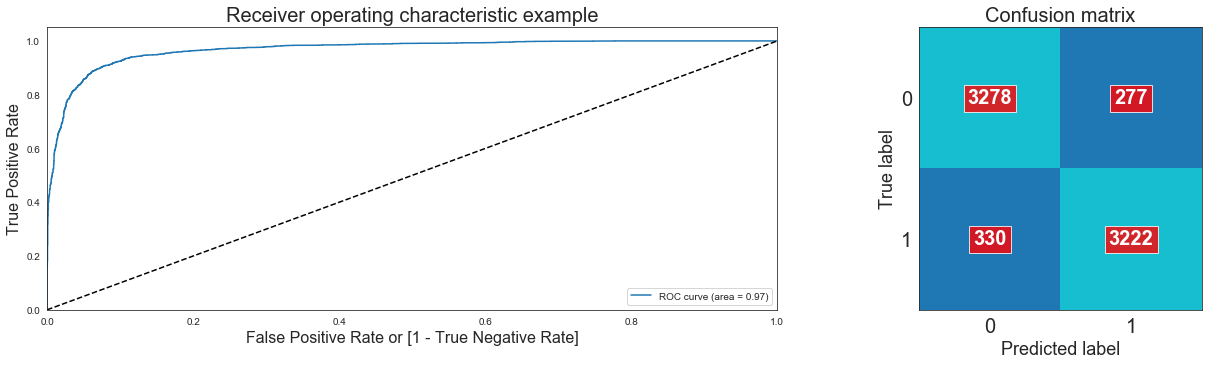

In [612]:
y_test_pred_catbc = catb_clf.predict_proba(X_test)[:,1:2]
y_test_pred_catbc = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_catbc.reshape(-1) })

catbc_auc_test, catbc_recall_test, catbc_precision_test, catbc_f1_test = \
                        draw_roc(y_test_pred_catbc.Class, y_test_pred_catbc.Class_Prob,True,.5)

### Model 11: Naive Bayes

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89  Threshold:0.00009


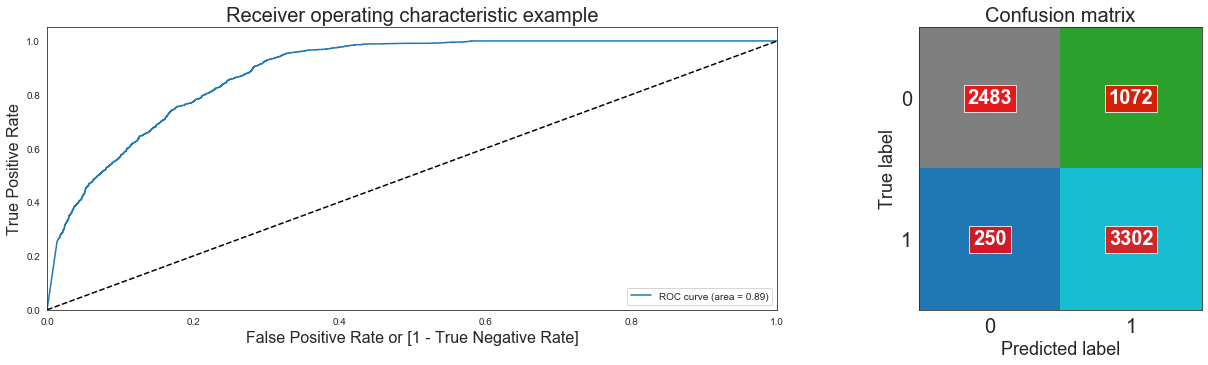

In [613]:
### Naive Bayes
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

y_test_pred_gnb = gnb.predict_proba(X_test)[:,1:2]
y_test_pred_gnb = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_gnb.reshape(-1) })

gnb_auc_test, gnb_recall_test, gnb_precision_test, gnb_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

In [614]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

### Model 12: Stochastic Gradient Descent 

In [615]:
#Cross Validation
start=timer()
if run_cv:
    hyper_params = [{ 'alpha': [10 ** x for x in range(-3, 1)],
                    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.9, 0.95, 1] }]
    sgd = SGDClassifier(random_state=0, class_weight='balanced',\
                        loss='log', penalty='elasticnet')

    model_cv_sgd = GridSearchCV(estimator=sgd, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_sgd.fit(X_train,  y_train)

    cv_results_sgd = pd.DataFrame(model_cv_sgd.cv_results_)
    cv_results_sgd.sort_values('rank_test_score')
    
end = timer()
print("Duration ",end - start)

Duration  0.00018529999942984432


In [616]:
if run_cv:
    print(model_cv_sgd.best_estimator_)

In [617]:
#draw_cv_results(cv_results_sgd, 'param_alpha', 'Recall', 'Optimal Alpha', False)
if run_cv:
    cv_results_sgd.param_l1_ratio = cv_results_sgd.param_l1_ratio.astype("float")
    cv_results_sgd.param_alpha = cv_results_sgd.param_alpha.astype("float")

    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    ax1=sns.lineplot(x= np.log(cv_results_sgd['param_alpha']), y='mean_test_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax1.set_xlabel="Log Param_Alpha"
    ax1.set_title("Test AUC Score")
    plt.subplot(1,2,2)
    ax2= sns.lineplot(x=np.log(cv_results_sgd['param_alpha']), y='mean_train_score', hue='param_l1_ratio',data=cv_results_sgd)
    ax2.set_xlabel="Log Param_Alpha"
    ax2.set_title("Train AUC Score")
    plt.show()

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89  Threshold:0.00009


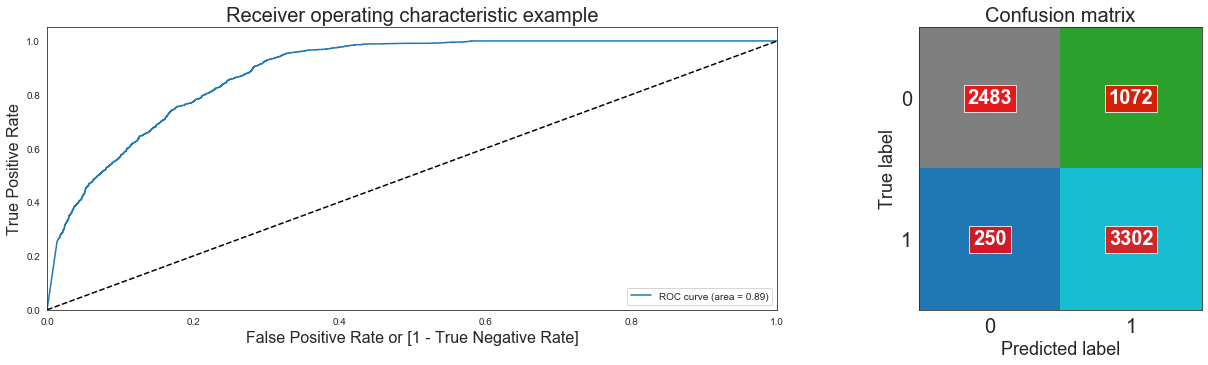

In [618]:
#Hyperparamter Tuning
sgd = SGDClassifier(max_iter=1000, random_state=100, penalty="elasticnet", alpha=0.0001, l1_ratio=0.2)
sgd.fit(X_train, y_train) 

y_test_pred_sgd = sgd.predict(X_test) #[:,1:2]
y_test_pred_sgd = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_sgd  }) #.reshape(-1)

sgd_auc_test, sgd_recall_test, sgd_precision_test, sgd_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.89  Threshold:0.00009


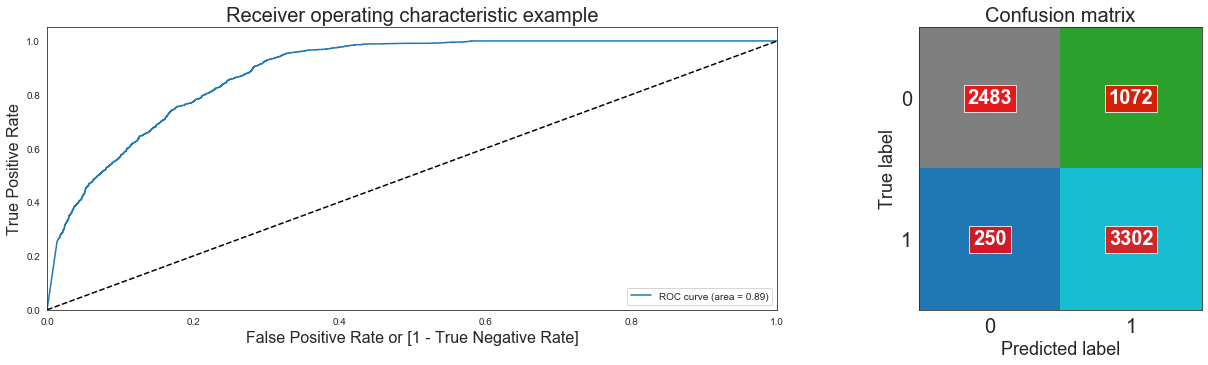

In [619]:
#Hyperparamter Tuning
sgd = SGDClassifier(max_iter=1000, random_state=100, penalty="elasticnet", alpha=0.0001, l1_ratio=0.2)
sgd.fit(X_train, y_train) 

y_test_pred_sgd = sgd.predict(X_test) #[:,1:2]
y_test_pred_sgd = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_sgd  }) #.reshape(-1)

sgd_auc_test, sgd_recall_test, sgd_precision_test, sgd_f1_test = \
                        draw_roc(y_test_pred_gnb.Class, y_test_pred_gnb.Class_Prob,True)

### Model 13:  Dense Neural Network

In [620]:
def create_dnn(indput_dim, dropout=0.2):
    model = Sequential([
    Dense(units=16, input_dim=indput_dim, activation='relu'),
    Dropout(dropout),
    Dense(units=16, activation='relu'),
    Dropout(dropout),
    Dense(1, activation='sigmoid')])
    return model

dnn = create_dnn(indput_dim=X_train.shape[1], dropout=0.2)
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(X_train, y_train,batch_size=100, epochs=50)

Epoch 1/50
21323/21323 [==============================] - 1s 29us/step - loss: 0.5697 - accuracy: 0.6977
Epoch 2/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.3510 - accuracy: 0.8563
Epoch 3/50
21323/21323 [==============================] - 0s 21us/step - loss: 0.2663 - accuracy: 0.8961
Epoch 4/50
21323/21323 [==============================] - 0s 17us/step - loss: 0.2159 - accuracy: 0.9189
Epoch 5/50
21323/21323 [==============================] - 0s 18us/step - loss: 0.1833 - accuracy: 0.9345
Epoch 6/50
21323/21323 [==============================] - 0s 21us/step - loss: 0.1567 - accuracy: 0.9456
Epoch 7/50
21323/21323 [==============================] - 0s 17us/step - loss: 0.1369 - accuracy: 0.9551
Epoch 8/50
21323/21323 [==============================] - 0s 19us/step - loss: 0.1226 - accuracy: 0.9615
Epoch 9/50
21323/21323 [==============================] - 0s 18us/step - loss: 0.1102 - accuracy: 0.9683
Epoch 10/50
21323/21323 [==============================

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.91  Threshold:0.00000


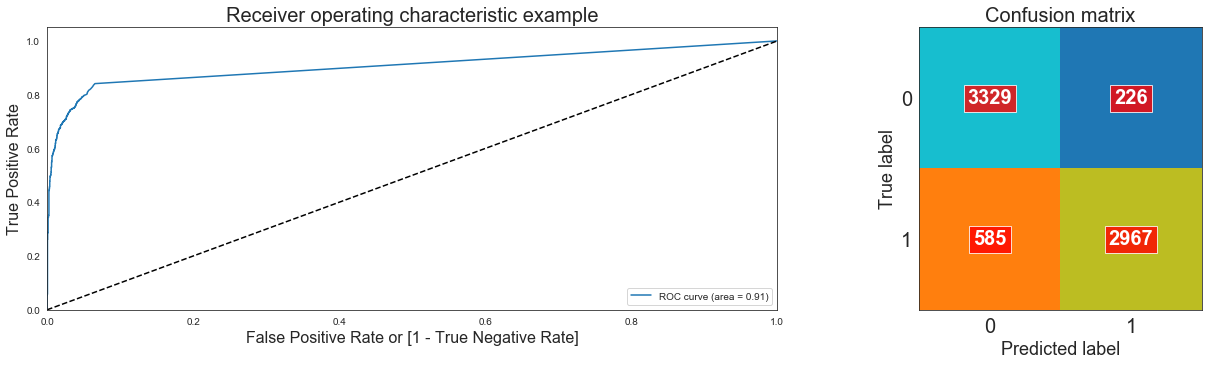

In [621]:
y_test_pred_dnn = dnn.predict(X_test).ravel()
y_test_pred_dnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_dnn  }) #.reshape(-1)

dnn_auc_test, dnn_recall_test, dnn_precision_test, dnn_f1_test = \
                        draw_roc(y_test_pred_dnn.Class, y_test_pred_dnn.Class_Prob,True)

### Model 14:  Convolution Neural Network

In [622]:
def create_dnn(indput_dim, dropout=0.2):
    cnn = Sequential()
    cnn.add(Conv1D(128, kernel_size = ( 5), activation='relu', padding="same",input_shape=(30, 1) ))
    cnn.add(layers.GlobalMaxPool1D())
    cnn.add(BatchNormalization())
    
    cnn.add(Dense(30,  activation='relu'))
    cnn.add(Dense(1, activation='sigmoid'))
    return cnn

xtrain = X_train.values.reshape(X_train.shape[0],X_train.shape[1],-1)
xtest  = X_test.values.reshape(X_test.shape[0],X_test.shape[1],-1)

cnn = create_dnn(indput_dim=xtrain.shape[1], dropout=0.2)
cnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit(xtrain, y_train,batch_size=5000, epochs=50)

Epoch 1/50
21323/21323 [==============================] - 2s 113us/step - loss: 0.6684 - accuracy: 0.6027
Epoch 2/50
21323/21323 [==============================] - 2s 96us/step - loss: 0.6083 - accuracy: 0.6649
Epoch 3/50
21323/21323 [==============================] - 2s 93us/step - loss: 0.5785 - accuracy: 0.6943
Epoch 4/50
21323/21323 [==============================] - 2s 94us/step - loss: 0.5532 - accuracy: 0.7225
Epoch 5/50
21323/21323 [==============================] - 2s 105us/step - loss: 0.5310 - accuracy: 0.7416
Epoch 6/50
21323/21323 [==============================] - 2s 115us/step - loss: 0.5114 - accuracy: 0.7578
Epoch 7/50
21323/21323 [==============================] - 2s 105us/step - loss: 0.4945 - accuracy: 0.7717
Epoch 8/50
21323/21323 [==============================] - 2s 112us/step - loss: 0.4789 - accuracy: 0.7818
Epoch 9/50
21323/21323 [==============================] - 2s 98us/step - loss: 0.4647 - accuracy: 0.7922
Epoch 10/50
21323/21323 [=========================

This Model Result is for  AdaSyn  Data
ROC AUC Score on Test: 0.74  Threshold:0.39348


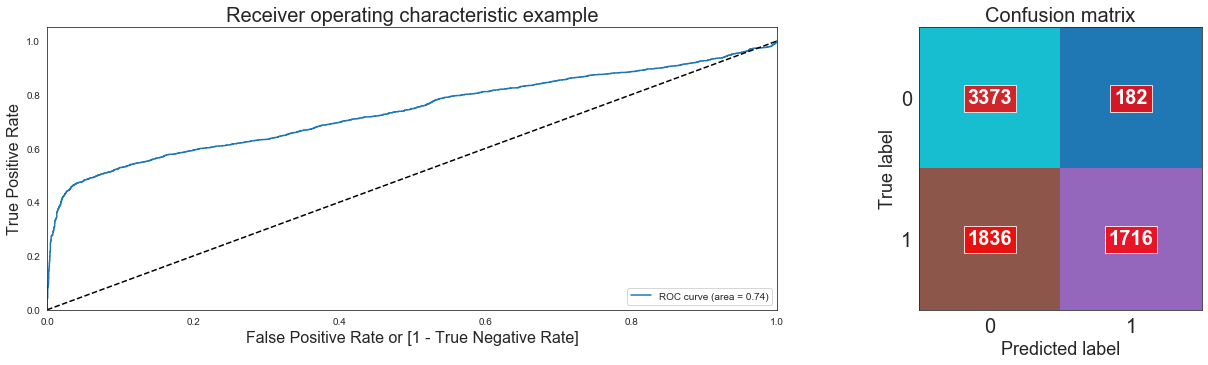

In [623]:
# y_test_pred_cnn = cnn.predict(xtest).ravel()
# y_test_pred_cnn = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred_cnn  }) #.reshape(-1)

cnn_auc_test, cnn_recall_test, cnn_precision_test, cnn_f1_test = \
                        draw_roc(y_test_pred_cnn.Class, y_test_pred_cnn.Class_Prob,True)

# <font color=blue> Section 5: Saving Results of All the Models</font>

### <font color=green> Results WITHOUT Addressing Imbalance Issue</color>

In [441]:
if option==0:
    normal_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, catbc_auc_test, gnb_auc_test, sgd_auc_test, dnn_auc_test, cnn_auc_test]

    normal_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                xgb_recall_test, adbc_recall_test, catbc_recall_test, gnb_recall_test, sgd_recall_test, dnn_recall_test, cnn_recall_test]

    normal_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                xgb_precision_test, adbc_precision_test, catbc_precision_test, gnb_precision_test, sgd_precision_test, dnn_precision_test, cnn_precision_test]

    normal_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, catbc_f1_test, gnb_f1_test, sgd_f1_test, dnn_f1_test, cnn_f1_test]

    normal_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'CatBoost','Naive Bayes', 'SGD', "DNN","CNN"],
        'AUC_Score': normal_roc,
        'Recall_Score': normal_recall,
        'Precision_Score': normal_precision,
        'F1_Score': normal_f1})

    print(normal_model_result.sort_values(by='AUC_Score', ascending=False))
    normal_model_result.to_csv("Normal_Model_Metrics.csv")

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.99          0.93             0.57      0.71
7                   SVM       0.99          0.94             0.45      0.61
0   Logistic Regression       0.98          0.89             0.66      0.75
1                   GLM       0.98          0.89             0.70      0.78
9              AdaBoost       0.98          0.90             0.53      0.67
10             CatBoost       0.98          0.91             0.56      0.69
13                  DNN       0.98          0.91             0.57      0.70
3         Random Forest       0.97          0.88             0.57      0.69
11          Naive Bayes       0.97          0.88             0.47      0.62
12                  SGD       0.97          0.88             0.47      0.62
8               XGBoost       0.96          0.90             0.56      0.69
2                   KNN       0.94          0.86             0.94      0.90
4         De

### <font color=green> Results with RandomOverSampler</font>

In [502]:
if option==1:
    ros_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    ros_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    ros_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    ros_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    ros_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
        'AUC_Score':ros_roc,
        'Recall_Score': ros_recall,
        'Precision_Score': ros_precision,
        'F1_Score': ros_f1})

    print(ros_model_result.sort_values(by='AUC_Score', ascending=False))
    ros_model_result.to_csv("ROS_Model_Metrics.csv")

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.99          0.93             0.97      0.95
0   Logistic Regression       0.98          0.89             0.99      0.93
1                   GLM       0.98          0.89             0.99      0.93
8               XGBoost       0.98          0.91             0.97      0.94
9              AdaBoost       0.98          0.89             0.97      0.93
3         Random Forest       0.97          0.89             0.98      0.93
7                   SVM       0.97          0.91             0.95      0.93
10          Naive Bayes       0.97          0.88             0.96      0.92
11                  SGD       0.97          0.88             0.96      0.92
2                   KNN       0.93          0.86             1.00      0.92
4         Decision Tree       0.89          0.78             0.99      0.87
6            Perceptron       0.89          0.84             0.93      0.88


### <font color=green> Results with Smote</font>

In [563]:
if option==2:
    smote_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    smote_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    smote_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    smote_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    smote_model_result = pd.DataFrame({
    'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
              'Decision Tree', 'LGBM', 'Perceptron','SVM',
              'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': smote_roc,
    'Recall_Score': smote_recall,
    'Precision_Score': smote_precision, 
    'F1_Score': smote_f1})

    print(smote_model_result.sort_values(by='AUC_Score', ascending=False))
    smote_model_result.to_csv("SMOTE_Model_Metrics.csv")

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
0   Logistic Regression       0.99          0.94             0.95      0.94
1                   GLM       0.99          0.94             0.95      0.94
5                  LGBM       0.99          0.96             0.98      0.97
8               XGBoost       0.99          0.93             0.98      0.95
9              AdaBoost       0.99          0.92             0.97      0.95
3         Random Forest       0.98          0.89             0.97      0.93
7                   SVM       0.98          0.92             0.98      0.95
2                   KNN       0.96          0.92             0.98      0.95
10          Naive Bayes       0.96          0.88             0.96      0.91
11                  SGD       0.96          0.88             0.96      0.91
4         Decision Tree       0.93          0.00             0.00      0.00
6            Perceptron       0.89          0.88             0.91      0.89


### <font color=green>Results with AdaSyn</font>

In [624]:
if option==3:
    adasyn_roc=[logistic_auc_test, glm_auc_test, knn_auc_test, rfc_auc_test,  
                dtc_auc_test, lgbm_auc_test, percept_auc_test, svm_auc_test, 
                xgb_auc_test, adbc_auc_test, gnb_auc_test, sgd_auc_test]

    adasyn_recall=[logistic_recall_test, glm_recall_test, knn_recall_test, rfc_recall_test,  
                   dtc_recall_test, lgbm_recall_test, percept_recall_test, svm_recall_test, 
                   xgb_recall_test, adbc_recall_test, gnb_recall_test, sgd_recall_test]

    adasyn_precision=[logistic_precision_test, glm_precision_test, knn_precision_test, rfc_precision_test,  
                      dtc_precision_test, lgbm_precision_test, percept_precision_test, svm_precision_test, 
                      xgb_precision_test, adbc_precision_test, gnb_precision_test, sgd_precision_test]

    adasyn_f1=[logistic_f1_test, glm_f1_test, knn_f1_test, rfc_f1_test,  
               dtc_f1_test, lgbm_f1_test, percept_f1_test, svm_f1_test, 
               xgb_f1_test, adbc_f1_test, gnb_f1_test, sgd_f1_test]

    adasyn_model_result = pd.DataFrame({
        'Model': ['Logistic Regression','GLM', 'KNN', 'Random Forest',  
                  'Decision Tree', 'LGBM', 'Perceptron','SVM',
                  'XGBoost','AdaBoost', 'Naive Bayes', 'SGD'],
    'AUC_Score': adasyn_roc,
    'Recall_Score': adasyn_recall,
    'Precision_Score': adasyn_precision,
    'F1_Score': adasyn_f1 })

    print(adasyn_model_result.sort_values(by='AUC_Score', ascending=False))
    adasyn_model_result.to_csv("ADASYN_Model_Metrics.csv")

                  Model  AUC_Score  Recall_Score  Precision_Score  F1_Score
5                  LGBM       0.98          0.94             0.92      0.93
3         Random Forest       0.96          0.94             0.90      0.92
0   Logistic Regression       0.95          0.91             0.86      0.88
1                   GLM       0.95          0.92             0.86      0.88
8               XGBoost       0.95          0.85             0.91      0.88
9              AdaBoost       0.95          0.86             0.91      0.88
7                   SVM       0.94          0.86             0.91      0.88
6            Perceptron       0.89          0.92             0.86      0.89
10          Naive Bayes       0.89          0.93             0.75      0.83
11                  SGD       0.89          0.93             0.75      0.83
2                   KNN       0.84          0.65             0.96      0.78
4         Decision Tree       0.79          0.61             0.95      0.74


# <font color=blue> Section 6: Comparing All the Models and all Data Imbalancing Methods</font>

### <font color=red>Before you move ahead please ensure you have run all the models with all data balancing methods. It means section 3, section 4 and Section 5 are run 4 time. 1st time for Normal (without data balancing), 2nd time for RandomOverSampler, 3rd time for Smote, 4th time for AdaSyn</font>

#### Mearge All Model, All Metrics Results Together

In [625]:
all_models1 = pd.merge(normal_model_result,ros_model_result,how="inner", on="Model",suffixes=["_normal","_ros"])
all_models2 = pd.merge(smote_model_result,adasyn_model_result,how="inner", on="Model",suffixes=["_smote","_adasyn"])
all_models = pd.merge(all_models1,all_models2,how="inner", on="Model")

In [626]:
all_models

,Model,AUC_Score_normal,Recall_Score_normal,Precision_Score_normal,F1_Score_normal,AUC_Score_ros,Recall_Score_ros,Precision_Score_ros,F1_Score_ros,AUC_Score_smote,Recall_Score_smote,Precision_Score_smote,F1_Score_smote,AUC_Score_adasyn,Recall_Score_adasyn,Precision_Score_adasyn,F1_Score_adasyn
0,Logistic Regression,0.98,0.89,0.66,0.75,0.98,0.89,0.99,0.93,0.99,0.94,0.95,0.94,0.95,0.91,0.86,0.88
1,GLM,0.98,0.89,0.70,0.78,0.98,0.89,0.99,0.93,0.99,0.94,0.95,0.94,0.95,0.92,0.86,0.88
2,KNN,0.94,0.86,0.94,0.90,0.93,0.86,1.00,0.92,0.96,0.92,0.98,0.95,0.84,0.65,0.96,0.78
3,Random Forest,0.97,0.88,0.57,0.69,0.97,0.89,0.98,0.93,0.98,0.89,0.97,0.93,0.96,0.94,0.90,0.92
4,Decision Tree,0.91,0.00,0.00,0.00,0.89,0.78,0.99,0.87,0.93,0.00,0.00,0.00,0.79,0.61,0.95,0.74
5,LGBM,0.99,0.93,0.57,0.71,0.99,0.93,0.97,0.95,0.99,0.96,0.98,0.97,0.98,0.94,0.92,0.93
6,Perceptron,0.90,0.80,0.90,0.85,0.89,0.84,0.93,0.88,0.89,0.88,0.91,0.89,0.89,0.92,0.86,0.89
7,SVM,0.99,0.94,0.45,0.61,0.97,0.91,0.95,0.93,0.98,0.92,0.98,0.95,0.94,0.86,0.91,0.88
8,XGBoost,0.96,0.90,0.56,0.69,0.98,0.91,0.97,0.94,0.99,0.93,0.98,0.95,0.95,0.85,0.91,0.88
9,AdaBoost,0.98,0.90,0.53,0.67,0.98,0.89,0.97,0.93,0.99,0.92,0.97,0.95,0.95,0.86,0.91,0.88


In [638]:
#AUC Score
print (np.max(np.max(all_models.iloc[:,[1,5,9,13]])))
all_models.iloc[:,[0,1,5,9,13]]
#Best AUC score on Test data with Any model is .99. This result is given by the models based on LBGM, LRm GLM, KNN 
#for Smote data.

0.99


,Model,AUC_Score_normal,AUC_Score_ros,AUC_Score_smote,AUC_Score_adasyn
0,Logistic Regression,0.98,0.98,0.99,0.95
1,GLM,0.98,0.98,0.99,0.95
2,KNN,0.94,0.93,0.96,0.84
3,Random Forest,0.97,0.97,0.98,0.96
4,Decision Tree,0.91,0.89,0.93,0.79
5,LGBM,0.99,0.99,0.99,0.98
6,Perceptron,0.90,0.89,0.89,0.89
7,SVM,0.99,0.97,0.98,0.94
8,XGBoost,0.96,0.98,0.99,0.95
9,AdaBoost,0.98,0.98,0.99,0.95


In [636]:
#F1 Score
print(np.max(np.max(all_models.iloc[1:,[4,8,12,16]])))
all_models.iloc[:,[0,4,8,12,16]]
#Best F1 score on Test data with Any model is .97. This result is given the model based on LGBM.
#for Smote data.


0.97


,Model,F1_Score_normal,F1_Score_ros,F1_Score_smote,F1_Score_adasyn
0,Logistic Regression,0.75,0.93,0.94,0.88
1,GLM,0.78,0.93,0.94,0.88
2,KNN,0.90,0.92,0.95,0.78
3,Random Forest,0.69,0.93,0.93,0.92
4,Decision Tree,0.00,0.87,0.00,0.74
5,LGBM,0.71,0.95,0.97,0.93
6,Perceptron,0.85,0.88,0.89,0.89
7,SVM,0.61,0.93,0.95,0.88
8,XGBoost,0.69,0.94,0.95,0.88
9,AdaBoost,0.67,0.93,0.95,0.88


In [640]:
#Recall Score
print (np.max(np.max(all_models.iloc[:,[2,6,10,14]] )))
all_models.iloc[:,[0,2,6,10,14]]  

#Best Recall score on Test data with Any model is .96.
#This result is given the model based on LGBM.
#Smote is the best data imbalance method in this case.

#It means .04 or 4% False Negative (Type II Error) cases with these models.
#It means system not able to identify 4% of fraud transactions. And they get pass as normal transactions. 

0.96


,Model,Recall_Score_normal,Recall_Score_ros,Recall_Score_smote,Recall_Score_adasyn
0,Logistic Regression,0.89,0.89,0.94,0.91
1,GLM,0.89,0.89,0.94,0.92
2,KNN,0.86,0.86,0.92,0.65
3,Random Forest,0.88,0.89,0.89,0.94
4,Decision Tree,0.00,0.78,0.00,0.61
5,LGBM,0.93,0.93,0.96,0.94
6,Perceptron,0.80,0.84,0.88,0.92
7,SVM,0.94,0.91,0.92,0.86
8,XGBoost,0.90,0.91,0.93,0.85
9,AdaBoost,0.90,0.89,0.92,0.86


In [641]:
#Precision Score
print (np.max(np.max(all_models.iloc[:,[3,7,11,15]])))
all_models.iloc[:,[0,3,7,11,15]]
#Best Precision score on Test data with Any model is 1. This is from KNN based on RandomOverSampler
#but LGBM still giving good results 98% 

#It means thre 2% False Positive (Type I) Case. Even if these transaction are normal model is classifying them a fraud.

1.0


,Model,Precision_Score_normal,Precision_Score_ros,Precision_Score_smote,Precision_Score_adasyn
0,Logistic Regression,0.66,0.99,0.95,0.86
1,GLM,0.70,0.99,0.95,0.86
2,KNN,0.94,1.00,0.98,0.96
3,Random Forest,0.57,0.98,0.97,0.90
4,Decision Tree,0.00,0.99,0.00,0.95
5,LGBM,0.57,0.97,0.98,0.92
6,Perceptron,0.90,0.93,0.91,0.86
7,SVM,0.45,0.95,0.98,0.91
8,XGBoost,0.56,0.97,0.98,0.91
9,AdaBoost,0.53,0.97,0.97,0.91


# <font color=blue>Section 7: Visuzalise Results of Various Oversampling Methods</font>

### Random Oversampling

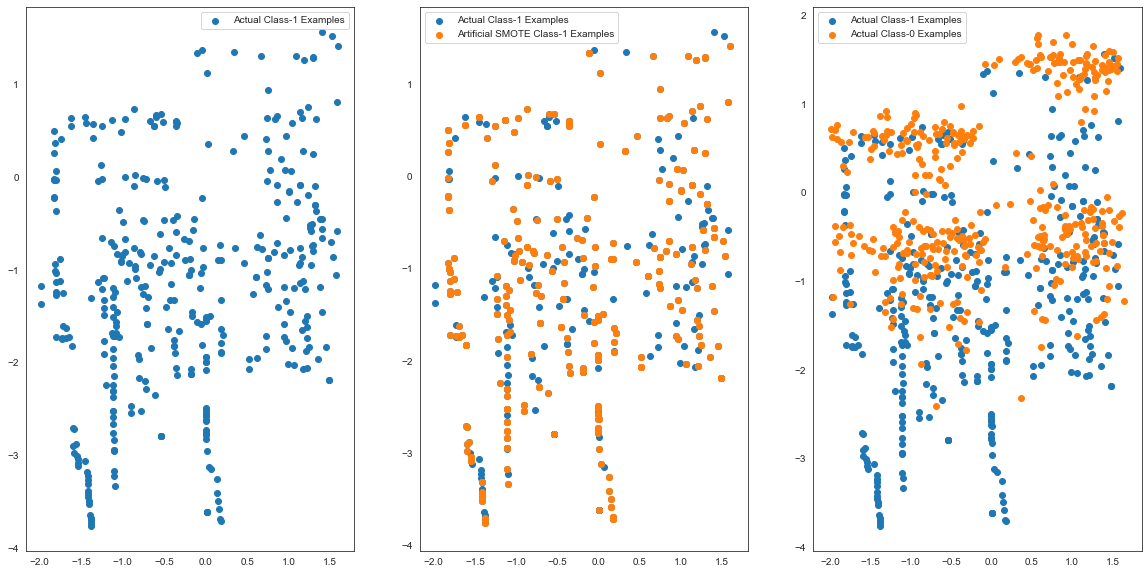

In [642]:
X_train_ros_1 = X_train_ros[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ros_1.iloc[:X_train_1.shape[0], 0], 
            X_train_ros_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], 
            X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### SMOTE : Synthetic Minority Over-sampling Technique

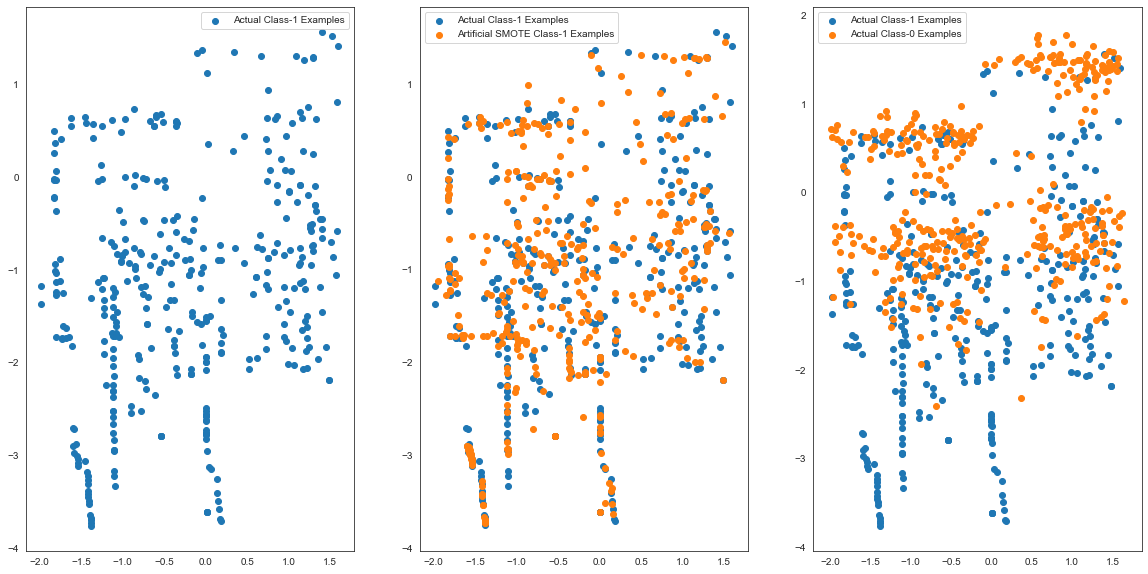

In [643]:
X_train_smote_1 = X_train_smote[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]


plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], 
            X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### ADASYN : Adaptive Synthetic Sampling Method

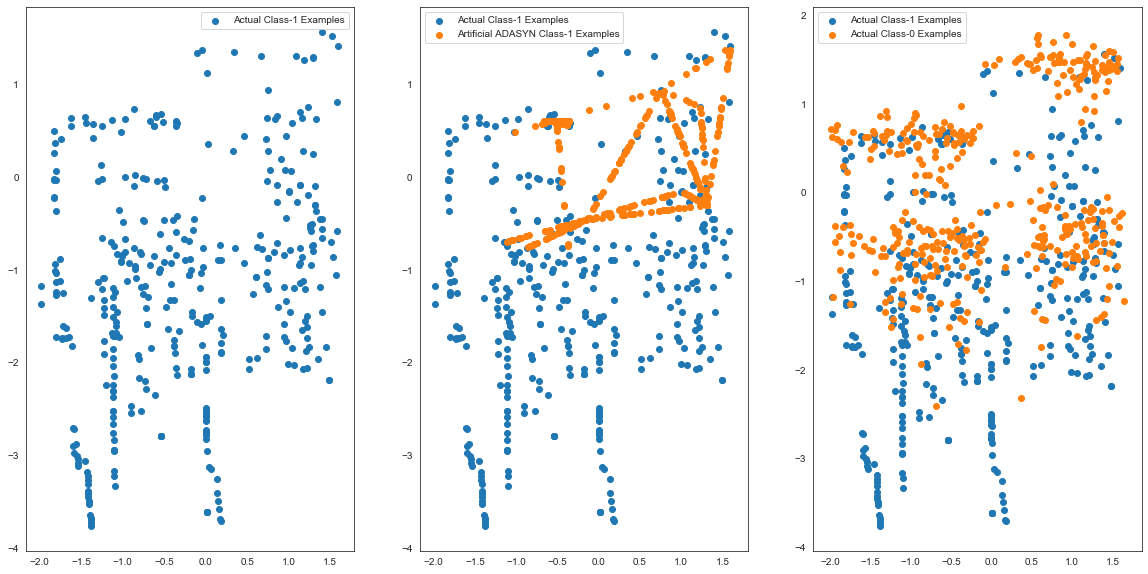

In [644]:
X_train_adasyn_1 = X_train_adasyn[X_train1.shape[0]:]

X_train_1 = X_train1.to_numpy()[np.where(y_train1==1.0)]
X_train_0 = X_train1.to_numpy()[np.where(y_train1==0.0)]

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()

plt.subplot(1, 3, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], 
            X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

# <font color=blue> Secion 8: Final Conslusion </font>

In [694]:
def getData_forFinal_Prediction_from_FullDataset(BalancingMethod):
    #Full dataset
    df = pd.read_csv(filename)

    #scale all the field
    sc=StandardScaler()
    t=sc.fit_transform(df[ cols2Scale ])
    df[cols2Scale] = t

    #apply power_transform
    df[cols2Scale] = power_transform(df[cols2Scale], method='yeo-johnson')

    #train test split
    X= df.drop(columns=["Class"], axis=0)
    y= df.Class #class variable

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,stratify=y, test_size=0.25, random_state=100)
    
    if BalancingMethod=="SMOTE":
        balancer = over_sampling.SMOTE(random_state=100)
        
    xtrain, ytrain   = balancer.fit_resample(X_train1, y_train1)
    xtest,  ytest    = balancer.fit_resample(X_test1, y_test1)

    return xtrain,ytrain,xtest,ytest

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.99  Threshold:0.01564


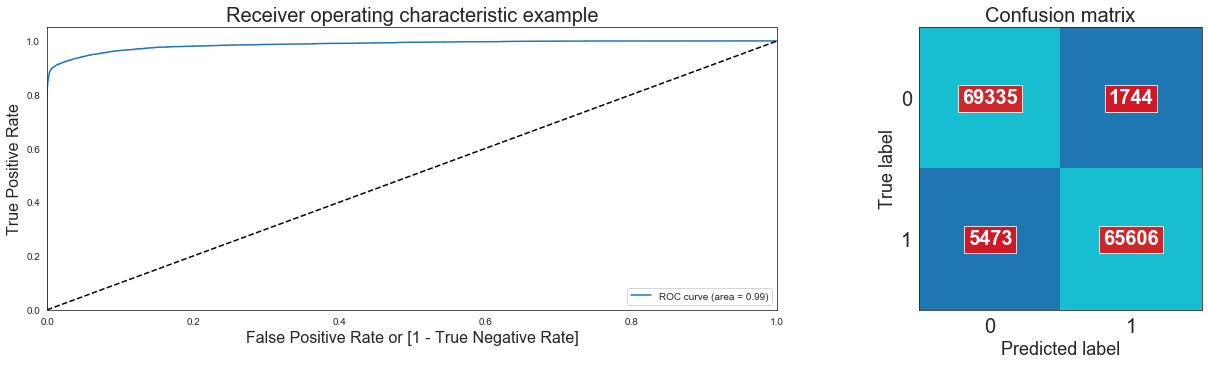

In [695]:
oo=option
#Imbalance Method: Smote
option=2
xtrain,ytrain,xtest,ytest = getData_forFinal_Prediction_from_FullDataset("SMOTE")

#Selected Algorithm: LGBM (Light Gradient Boosting Machine)
clf = lgbm.LGBMClassifier(n_estimators=100, random_state = 42)

clf.fit(xtrain,ytrain)
y_test_pred_final = clf.predict_proba(xtest)[:,1:2]

y_test_pred_final = pd.DataFrame({'Class':ytest.values, 'Class_Prob':y_test_pred_final.reshape(-1) })

final_auc_test, final_recall_test, final_precision_test, final_f1_test = \
                        draw_roc(y_test_pred_final.Class, y_test_pred_final.Class_Prob,True)

fpr, tpr, thresholds = metrics.roc_curve(ytest,y_test_pred_final.Class_Prob)
threshold = thresholds[np.argmax(tpr-fpr)]

In [696]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc =', final_auc_test)

print ("Test Recall Score",final_recall_test) 

print ("Test Precision Score",final_precision_test )

print ("Test F1 Score", final_f1_test )

print("Treshold",threshold)

Test auc = 0.99
Test Recall Score 0.92
Test Precision Score 0.97
Test F1 Score 0.95
Treshold 0.01563805095394799


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15 V14
2nd Top var = 5 V4
3rd Top var = 2 V1


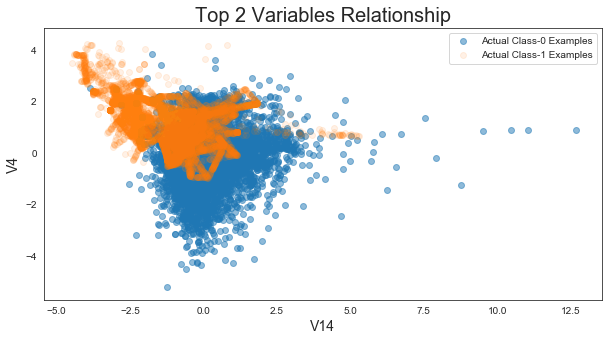

In [697]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])
third_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-3])

print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1, X_train.columns[top_var_index])
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1, X_train.columns[second_top_var_index])
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1, X_train.columns[third_top_var_index])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index], 
            label='Actual Class-0 Examples', alpha=.5)
plt.scatter( X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', alpha=.1)
plt.xlabel(X_train.columns[top_var_index], fontsize=14)
plt.ylabel(X_train.columns[second_top_var_index], fontsize=14)
plt.title("Top 2 Variables Relationship", fontsize=20)
plt.legend()

# <font color=blue> Secion 9: Financial Benefits of the Model </font>

In [237]:
#Total Fraud transactions in 2 days are 384. In one day 192 fraud transaction (average)
#Total normal transaction in 2 days are 284807. In one day 142,403 normal transations (average)
#Average fraud transaction is $122. In a 6 months FRAUD Tranactions of $122*6*30*192 = 42,16,320 i.e $ 4.2 million 
#can happen in the bank. 

#Next Six Month Approx Fraud Transactions: 34,560
#Next Six Month Approx Normal Transactions:51,265,260

#Recall score is 92% means 8% is False Negative.
#it means everyday 16 (8% of 192) normal transactions will be marked as fraud. 
#It also means 176 (92% of 192) fraud transactions can be caught using our model.

#i.e. out of 34560 fraud transactions our model can detect 31680 correctly in 6month. 
#And 2880 transaction will be False Negative. These are fraud transaction which our fail to detect.

#Precision score is 97% means 3% is False Positive it means for every 100 fraud transactions identied by the system 
#3 are normal transaction. This can lead to customer dissatisfaction.

#If bank call to the customer for all the transaction which are detected as fraud then only 3% cases will be 
#irritating call for the customer. Because he/she feel it is my genuine transaction.
#(176/.97)=> 181 calls every day=> 181 * 180 (days) =>  32580 calls (6 months)
#if Cost of each call is Rs 10 (assuming call centre in India) then cost of making 
#Then cost of making these call is Rs. 3,25,800. It can solve 92% fraud related problems
#For other normal transactions bank can call to the customer as per their policy based on random samplng and calling.
#In this they will be able to identify some of those 16 transactions which model couldn't detect.